
<h1><center> Phân tích chuỗi thời gian và dự báo bán hàng</center></h1>

<img src='Pic/bh.jpg' width='500px'>

> Dự báo bán hàng là sự ước đoán về lượng bán của doanh nghiệp, (tính bằng tiền hoặc theo đơn vị sản phẩm) có thể bán được trong một thời kì nhất định dưới một kế hoạch marketing đã được thông qua và dưới một tổ hợp các điều kiện kinh tế được giả định

<img src='Pic/time.png' width='500px'>

> Time series data được hiểu một cách đơn giản là một tập dữ liệu được lấy theo chu kì thời gian nhất định.Ví dụ lấy theo phút, giờ , ngày hay tháng năm .

# mục tiêu
1. Phân tích, Xử lý dữ liệu chuỗi thời gian
2. Tìm ra thông tin ẩn từ data bằng cách sử dụng biểu đồ  
3. xây dụng mạng nơ-ron dự báo bán hàng


## 1) import thư viện

In [1]:
#Gọi các thư viện sử dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
# hiển thị nội dung trong của sổ diêng biệt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Đọc file dữ liệu
path='Data/agricultural_raw_material.csv'
data_raw = pd.read_csv(path)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

**MÔ TẢ DỮ LIỆU:**

Tập dữ liệu agricultural_raw_material.csv lưu trữ dữ liệu về giá của một số sản phẩm nông nghiệp và tỷ lệ tăng giá bán, dữ liệu được tính theo tháng từ tháng 04/1990 --> 04/2020:
1. Coarse wool (Len Thô)
2. Copra (Giá cùi dừa)
3. Cotton (Giá bông)
4. Fine Wool (Giá len mịn)
5. Hard log (Giá gỗ cứng)
6. Hard sawnwood (Giá gỗ xẻ cứng)
7. Hide (da thú)
8. Rubber (Cao su)

In [3]:
data_raw.describe()

Cotton Price  Hard log Price  Hard sawnwood Price  Hide Price  \
count    361.000000      361.000000           327.000000  327.000000   
mean       1.640000      251.034072           707.950367   78.566667   
std        0.513319       65.628406           144.563241   13.690623   
min        0.820000      133.280000           413.370000   28.590000   
25%        1.290000      197.960000           573.470000   69.495000   
50%        1.600000      253.010000           728.710000   77.250000   
75%        1.850000      282.970000           831.635000   86.000000   
max        5.060000      520.810000           973.600000  114.630000   

       Rubber Price  
count    361.000000  
mean       1.656427  
std        1.017086  
min        0.490000  
25%        0.860000  
50%        1.440000  
75%        2.060000  
max        6.260000

In [4]:
data_raw.head()

Month Coarse wool Price Coarse wool price % Change Copra Price  \
0  Apr-90            482.34                          -         236   
1  May-90            447.26                     -7.27%         234   
2  Jun-90            440.99                     -1.40%         216   
3  Jul-90            418.44                     -5.11%         205   
4  Aug-90            418.44                      0.00%         198   

  Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
0                    -          1.83                     -        1,071.63   
1               -0.85%          1.89                 3.28%        1,057.18   
2               -7.69%          1.99                 5.29%          898.24   
3               -5.09%          2.01                 1.01%          895.83   
4               -3.41%          1.79               -10.95%          951.22   

  Fine wool price % Change  Hard log Price Hard log price % Change  \
0                        -          161.20                       -   
1                   -1.35%          172.86                   7.23%   
2                  -15.03%          181.67                   5.10%   
3                   -0.27%          187.96                   3.46%   
4                    6.18%          186.13                  -0.97%   

   Hard sawnwood Price Hard sawnwood price % Change  Hide Price  \
0               549.91                            -      100.00   
1               491.88                      -10.55%       99.46   
2               495.39                        0.71%       97.90   
3               485.86                       -1.92%       96.75   
4               487.52                        0.34%       91.89   

  Hide price % change  Rubber Price Rubber price % Change  
0                   -          0.84                     -  
1              -0.54%          0.85                 1.19%  
2              -1.57%          0.85                 0.00%  
3              -1.17%          0.86                 1.18%  
4              -5.02%          0.88                 2.33%

## 2) Chuẩn bị và tiền xử lý dữ liệu
---
**Các vấn đề cần xử lý với tập dữ liệu:**
1. Chuẩn hóa dữ liệu thời gian cột Month: 
    * Tách thành hai cột Year (YY) | Month(text)
    * Chuyển Year về năm đầy đủ (YYYY)
    * Chuyển dữ liệu Month từ Text ---> Số
2. Chuẩn hóa dữ liệu tỷ lệ % tăng giá dòng dầu tiên từ '-' về số 0
3. Chuẩn hóa dữ liệu tỷ lệ % tăng giá
    * Bỏ dấu % trong số liệu
    * Chuyển về dữ liệu float
4. Chuẩn hóa dữ liệu giá bán: trường hợp giá lớn hơn 1000 có dấu , phân cách giữa hàng trăm và hàng nghìn (1,011.45 -- kiểu: object)
    * Bỏ dấu , khỏi chuỗi
    * Chuyển về kiểu dữ liệu float

In [5]:
#Khai báo dánh sách các tên cột ứng với dữ liệu Price và tỷ lệ % thay đổi giá
#List các columns Price
prices=['Coarse wool Price',
       'Copra Price', 
       'Cotton Price',
       'Fine wool Price',
       'Hard log Price', 
       'Hard sawnwood Price',
       'Hide Price', 
       'Rubber Price']

#List các columns Percentages
percentages=['Coarse wool price % Change',
            'Copra price % Change', 
            'Cotton price % Change', 
            'Fine wool price % Change',
            'Hard log price % Change', 
            'Hard sawnwood price % Change', 
            'Hide price % change',
            'Rubber price % Change']

### 2.1) Chuẩn hóa dữ liệu thời gian cột Month
---
Tách thành 2 phần year - month từ cột Month dựa vào ký hiệu -

In [6]:
# dữ liệu với 5 dòng đầu
data_raw.head()

Month Coarse wool Price Coarse wool price % Change Copra Price  \
0  Apr-90            482.34                          -         236   
1  May-90            447.26                     -7.27%         234   
2  Jun-90            440.99                     -1.40%         216   
3  Jul-90            418.44                     -5.11%         205   
4  Aug-90            418.44                      0.00%         198   

  Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
0                    -          1.83                     -        1,071.63   
1               -0.85%          1.89                 3.28%        1,057.18   
2               -7.69%          1.99                 5.29%          898.24   
3               -5.09%          2.01                 1.01%          895.83   
4               -3.41%          1.79               -10.95%          951.22   

  Fine wool price % Change  Hard log Price Hard log price % Change  \
0                        -          161.20                       -   
1                   -1.35%          172.86                   7.23%   
2                  -15.03%          181.67                   5.10%   
3                   -0.27%          187.96                   3.46%   
4                    6.18%          186.13                  -0.97%   

   Hard sawnwood Price Hard sawnwood price % Change  Hide Price  \
0               549.91                            -      100.00   
1               491.88                      -10.55%       99.46   
2               495.39                        0.71%       97.90   
3               485.86                       -1.92%       96.75   
4               487.52                        0.34%       91.89   

  Hide price % change  Rubber Price Rubber price % Change  
0                   -          0.84                     -  
1              -0.54%          0.85                 1.19%  
2              -1.57%          0.85                 0.00%  
3              -1.17%          0.86                 1.18%  
4              -5.02%          0.88                 2.33%

In [7]:
# tách cột month, year từ Month
data_raw["month"] = [str(s.split("-")[0]) for s in data_raw["Month"]]
data_raw["year"] = [int(s.split("-")[1]) for s in data_raw["Month"]]
data_raw.head()

Month Coarse wool Price Coarse wool price % Change Copra Price  \
0  Apr-90            482.34                          -         236   
1  May-90            447.26                     -7.27%         234   
2  Jun-90            440.99                     -1.40%         216   
3  Jul-90            418.44                     -5.11%         205   
4  Aug-90            418.44                      0.00%         198   

  Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
0                    -          1.83                     -        1,071.63   
1               -0.85%          1.89                 3.28%        1,057.18   
2               -7.69%          1.99                 5.29%          898.24   
3               -5.09%          2.01                 1.01%          895.83   
4               -3.41%          1.79               -10.95%          951.22   

  Fine wool price % Change  Hard log Price Hard log price % Change  \
0                        -          161.20                       -   
1                   -1.35%          172.86                   7.23%   
2                  -15.03%          181.67                   5.10%   
3                   -0.27%          187.96                   3.46%   
4                    6.18%          186.13                  -0.97%   

   Hard sawnwood Price Hard sawnwood price % Change  Hide Price  \
0               549.91                            -      100.00   
1               491.88                      -10.55%       99.46   
2               495.39                        0.71%       97.90   
3               485.86                       -1.92%       96.75   
4               487.52                        0.34%       91.89   

  Hide price % change  Rubber Price Rubber price % Change month  year  
0                   -          0.84                     -   Apr    90  
1              -0.54%          0.85                 1.19%   May    90  
2              -1.57%          0.85                 0.00%   Jun    90  
3              -1.17%          0.86                 1.18%   Jul    90  
4              -5.02%          0.88                 2.33%   Aug    90

In [8]:
#Year chỉ bao gồm 2 số cuối của năm cần thực hiện
#Chuyển Year về số hàng nghìn 19xx - 20xx (<89)
data_raw['year'] = [2000 + i if i < 89 else 1900 + i for i in data_raw["year"]]
data_raw.head()

Month Coarse wool Price Coarse wool price % Change Copra Price  \
0  Apr-90            482.34                          -         236   
1  May-90            447.26                     -7.27%         234   
2  Jun-90            440.99                     -1.40%         216   
3  Jul-90            418.44                     -5.11%         205   
4  Aug-90            418.44                      0.00%         198   

  Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
0                    -          1.83                     -        1,071.63   
1               -0.85%          1.89                 3.28%        1,057.18   
2               -7.69%          1.99                 5.29%          898.24   
3               -5.09%          2.01                 1.01%          895.83   
4               -3.41%          1.79               -10.95%          951.22   

  Fine wool price % Change  Hard log Price Hard log price % Change  \
0                        -          161.20                       -   
1                   -1.35%          172.86                   7.23%   
2                  -15.03%          181.67                   5.10%   
3                   -0.27%          187.96                   3.46%   
4                    6.18%          186.13                  -0.97%   

   Hard sawnwood Price Hard sawnwood price % Change  Hide Price  \
0               549.91                            -      100.00   
1               491.88                      -10.55%       99.46   
2               495.39                        0.71%       97.90   
3               485.86                       -1.92%       96.75   
4               487.52                        0.34%       91.89   

  Hide price % change  Rubber Price Rubber price % Change month  year  
0                   -          0.84                     -   Apr  1990  
1              -0.54%          0.85                 1.19%   May  1990  
2              -1.57%          0.85                 0.00%   Jun  1990  
3              -1.17%          0.86                 1.18%   Jul  1990  
4              -5.02%          0.88                 2.33%   Aug  1990

In [9]:
data_raw.tail(5)

Month Coarse wool Price Coarse wool price % Change Copra Price  \
356  Dec-19               NaN                        NaN         NaN   
357  Jan-20               NaN                        NaN         NaN   
358  Feb-20               NaN                        NaN         NaN   
359  Mar-20               NaN                        NaN         NaN   
360  Apr-20               NaN                        NaN         NaN   

    Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
356                  NaN          1.67                 1.21%             NaN   
357                  NaN          1.74                 4.19%             NaN   
358                  NaN          1.69                -2.87%             NaN   
359                  NaN          1.49               -11.83%             NaN   
360                  NaN          1.40                -6.04%             NaN   

    Fine wool price % Change  Hard log Price Hard log price % Change  \
356                      NaN          272.80                  -0.22%   
357                      NaN          272.40                  -0.15%   
358                      NaN          270.56                  -0.68%   
359                      NaN          276.93                   2.35%   
360                      NaN          276.24                  -0.25%   

     Hard sawnwood Price Hard sawnwood price % Change  Hide Price  \
356                  NaN                          NaN         NaN   
357                  NaN                          NaN         NaN   
358                  NaN                          NaN         NaN   
359                  NaN                          NaN         NaN   
360                  NaN                          NaN         NaN   

    Hide price % change  Rubber Price Rubber price % Change month  year  
356                 NaN          1.66                 7.79%   Dec  2019  
357                 NaN          1.68                 1.20%   Jan  2020  
358                 NaN          1.61                -4.17%   Feb  2020  
359                 NaN          1.50                -6.83%   Mar  2020  
360                 NaN          1.33               -11.33%   Apr  2020

In [10]:
# Chuyển đổi dữ liệu cột month từ string của các tháng --> số
#Check các 'ký hiệu' tháng khác nhau trong cột month
data_raw['month'].value_counts()

Apr    31
May    30
Jun    30
Jul    30
Aug    30
Sep    30
Oct    30
Nov    30
Dec    30
Jan    30
Feb    30
Mar    30
Name: month, dtype: int64

In [11]:
#Thực hiện chuyển sang số nguyên ứng với các ký hiệu của từng tháng
mapping = {"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, 
           "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12}
data_raw["month"] = data_raw["month"].map(mapping).astype("int16")
data_raw.head()

Month Coarse wool Price Coarse wool price % Change Copra Price  \
0  Apr-90            482.34                          -         236   
1  May-90            447.26                     -7.27%         234   
2  Jun-90            440.99                     -1.40%         216   
3  Jul-90            418.44                     -5.11%         205   
4  Aug-90            418.44                      0.00%         198   

  Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
0                    -          1.83                     -        1,071.63   
1               -0.85%          1.89                 3.28%        1,057.18   
2               -7.69%          1.99                 5.29%          898.24   
3               -5.09%          2.01                 1.01%          895.83   
4               -3.41%          1.79               -10.95%          951.22   

  Fine wool price % Change  Hard log Price Hard log price % Change  \
0                        -          161.20                       -   
1                   -1.35%          172.86                   7.23%   
2                  -15.03%          181.67                   5.10%   
3                   -0.27%          187.96                   3.46%   
4                    6.18%          186.13                  -0.97%   

   Hard sawnwood Price Hard sawnwood price % Change  Hide Price  \
0               549.91                            -      100.00   
1               491.88                      -10.55%       99.46   
2               495.39                        0.71%       97.90   
3               485.86                       -1.92%       96.75   
4               487.52                        0.34%       91.89   

  Hide price % change  Rubber Price Rubber price % Change  month  year  
0                   -          0.84                     -      4  1990  
1              -0.54%          0.85                 1.19%      5  1990  
2              -1.57%          0.85                 0.00%      6  1990  
3              -1.17%          0.86                 1.18%      7  1990  
4              -5.02%          0.88                 2.33%      8  1990

In [12]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [13]:
#Cột year dữ liệu năm - cột month dữ liệu tháng
#Tạo ra một một dữ liệu datetime ghép từ Year và Month
data_raw["Date"] = [str(y) + '-' + str(m) for y,m in zip(data_raw["year"], data_raw["month"])]
#chuyển đổi cột Date về dạng DateTime
data_raw['Date']=pd.to_datetime(data_raw["Date"])
data_raw.head()

Month Coarse wool Price Coarse wool price % Change Copra Price  \
0  Apr-90            482.34                          -         236   
1  May-90            447.26                     -7.27%         234   
2  Jun-90            440.99                     -1.40%         216   
3  Jul-90            418.44                     -5.11%         205   
4  Aug-90            418.44                      0.00%         198   

  Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
0                    -          1.83                     -        1,071.63   
1               -0.85%          1.89                 3.28%        1,057.18   
2               -7.69%          1.99                 5.29%          898.24   
3               -5.09%          2.01                 1.01%          895.83   
4               -3.41%          1.79               -10.95%          951.22   

  Fine wool price % Change  Hard log Price Hard log price % Change  \
0                        -          161.20                       -   
1                   -1.35%          172.86                   7.23%   
2                  -15.03%          181.67                   5.10%   
3                   -0.27%          187.96                   3.46%   
4                    6.18%          186.13                  -0.97%   

   Hard sawnwood Price Hard sawnwood price % Change  Hide Price  \
0               549.91                            -      100.00   
1               491.88                      -10.55%       99.46   
2               495.39                        0.71%       97.90   
3               485.86                       -1.92%       96.75   
4               487.52                        0.34%       91.89   

  Hide price % change  Rubber Price Rubber price % Change  month  year  \
0                   -          0.84                     -      4  1990   
1              -0.54%          0.85                 1.19%      5  1990   
2              -1.57%          0.85                 0.00%      6  1990   
3              -1.17%          0.86                 1.18%      7  1990   
4              -5.02%          0.88                 2.33%      8  1990   

        Date  
0 1990-04-01  
1 1990-05-01  
2 1990-06-01  
3 1990-07-01  
4 1990-08-01

In [14]:
##Xóa các cột dữ thừa không sử dụng và set cột Date thành cột index
#data_raw.drop(["Month","year","month"], axis=1,inplace=True)
# set index cho cột date
data_raw.set_index("Date",inplace=True)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1990-04-01 to 2020-04-01
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null   

In [15]:
data_raw.head()

Month Coarse wool Price Coarse wool price % Change Copra Price  \
Date                                                                          
1990-04-01  Apr-90            482.34                          -         236   
1990-05-01  May-90            447.26                     -7.27%         234   
1990-06-01  Jun-90            440.99                     -1.40%         216   
1990-07-01  Jul-90            418.44                     -5.11%         205   
1990-08-01  Aug-90            418.44                      0.00%         198   

           Copra price % Change  Cotton Price Cotton price % Change  \
Date                                                                  
1990-04-01                    -          1.83                     -   
1990-05-01               -0.85%          1.89                 3.28%   
1990-06-01               -7.69%          1.99                 5.29%   
1990-07-01               -5.09%          2.01                 1.01%   
1990-08-01               -3.41%          1.79               -10.95%   

           Fine wool Price Fine wool price % Change  Hard log Price  \
Date                                                                  
1990-04-01        1,071.63                        -          161.20   
1990-05-01        1,057.18                   -1.35%          172.86   
1990-06-01          898.24                  -15.03%          181.67   
1990-07-01          895.83                   -0.27%          187.96   
1990-08-01          951.22                    6.18%          186.13   

           Hard log price % Change  Hard sawnwood Price  \
Date                                                      
1990-04-01                       -               549.91   
1990-05-01                   7.23%               491.88   
1990-06-01                   5.10%               495.39   
1990-07-01                   3.46%               485.86   
1990-08-01                  -0.97%               487.52   

           Hard sawnwood price % Change  Hide Price Hide price % change  \
Date                                                                      
1990-04-01                            -      100.00                   -   
1990-05-01                      -10.55%       99.46              -0.54%   
1990-06-01                        0.71%       97.90              -1.57%   
1990-07-01                       -1.92%       96.75              -1.17%   
1990-08-01                        0.34%       91.89              -5.02%   

            Rubber Price Rubber price % Change  month  year  
Date                                                         
1990-04-01          0.84                     -      4  1990  
1990-05-01          0.85                 1.19%      5  1990  
1990-06-01          0.85                 0.00%      6  1990  
1990-07-01          0.86                 1.18%      7  1990  
1990-08-01          0.88                 2.33%      8  1990

### 2.2) Xử lý dữ liệu các cột tỷ lệ thay đổi giá.
---
* Xử lý dòng dữ liệu đầu tiên của Data_raw
* Thay thế ký hiệu - thành ký tự 0

In [16]:
data_raw = data_raw.replace('-','0')
data_raw.head()

Month Coarse wool Price Coarse wool price % Change Copra Price  \
Date                                                                          
1990-04-01  Apr-90            482.34                          0         236   
1990-05-01  May-90            447.26                     -7.27%         234   
1990-06-01  Jun-90            440.99                     -1.40%         216   
1990-07-01  Jul-90            418.44                     -5.11%         205   
1990-08-01  Aug-90            418.44                      0.00%         198   

           Copra price % Change  Cotton Price Cotton price % Change  \
Date                                                                  
1990-04-01                    0          1.83                     0   
1990-05-01               -0.85%          1.89                 3.28%   
1990-06-01               -7.69%          1.99                 5.29%   
1990-07-01               -5.09%          2.01                 1.01%   
1990-08-01               -3.41%          1.79               -10.95%   

           Fine wool Price Fine wool price % Change  Hard log Price  \
Date                                                                  
1990-04-01        1,071.63                        0          161.20   
1990-05-01        1,057.18                   -1.35%          172.86   
1990-06-01          898.24                  -15.03%          181.67   
1990-07-01          895.83                   -0.27%          187.96   
1990-08-01          951.22                    6.18%          186.13   

           Hard log price % Change  Hard sawnwood Price  \
Date                                                      
1990-04-01                       0               549.91   
1990-05-01                   7.23%               491.88   
1990-06-01                   5.10%               495.39   
1990-07-01                   3.46%               485.86   
1990-08-01                  -0.97%               487.52   

           Hard sawnwood price % Change  Hide Price Hide price % change  \
Date                                                                      
1990-04-01                            0      100.00                   0   
1990-05-01                      -10.55%       99.46              -0.54%   
1990-06-01                        0.71%       97.90              -1.57%   
1990-07-01                       -1.92%       96.75              -1.17%   
1990-08-01                        0.34%       91.89              -5.02%   

            Rubber Price Rubber price % Change  month  year  
Date                                                         
1990-04-01          0.84                     0      4  1990  
1990-05-01          0.85                 1.19%      5  1990  
1990-06-01          0.85                 0.00%      6  1990  
1990-07-01          0.86                 1.18%      7  1990  
1990-08-01          0.88                 2.33%      8  1990

### 2.3) Loại bỏ ký hiệu % trong số liệu và chuyển sang kiểu dữ liệu float
---

In [17]:
for i in percentages:
    data_raw[i] = data_raw[i].apply(lambda x: str(x).replace('%',''))
    data_raw[i] = data_raw[i].astype('float')
#Kết quả sau xử lý
data_raw.head()

Month Coarse wool Price  Coarse wool price % Change Copra Price  \
Date                                                                           
1990-04-01  Apr-90            482.34                        0.00         236   
1990-05-01  May-90            447.26                       -7.27         234   
1990-06-01  Jun-90            440.99                       -1.40         216   
1990-07-01  Jul-90            418.44                       -5.11         205   
1990-08-01  Aug-90            418.44                        0.00         198   

            Copra price % Change  Cotton Price  Cotton price % Change  \
Date                                                                    
1990-04-01                  0.00          1.83                   0.00   
1990-05-01                 -0.85          1.89                   3.28   
1990-06-01                 -7.69          1.99                   5.29   
1990-07-01                 -5.09          2.01                   1.01   
1990-08-01                 -3.41          1.79                 -10.95   

           Fine wool Price  Fine wool price % Change  Hard log Price  \
Date                                                                   
1990-04-01        1,071.63                      0.00          161.20   
1990-05-01        1,057.18                     -1.35          172.86   
1990-06-01          898.24                    -15.03          181.67   
1990-07-01          895.83                     -0.27          187.96   
1990-08-01          951.22                      6.18          186.13   

            Hard log price % Change  Hard sawnwood Price  \
Date                                                       
1990-04-01                     0.00               549.91   
1990-05-01                     7.23               491.88   
1990-06-01                     5.10               495.39   
1990-07-01                     3.46               485.86   
1990-08-01                    -0.97               487.52   

            Hard sawnwood price % Change  Hide Price  Hide price % change  \
Date                                                                        
1990-04-01                          0.00      100.00                 0.00   
1990-05-01                        -10.55       99.46                -0.54   
1990-06-01                          0.71       97.90                -1.57   
1990-07-01                         -1.92       96.75                -1.17   
1990-08-01                          0.34       91.89                -5.02   

            Rubber Price  Rubber price % Change  month  year  
Date                                                          
1990-04-01          0.84                   0.00      4  1990  
1990-05-01          0.85                   1.19      5  1990  
1990-06-01          0.85                   0.00      6  1990  
1990-07-01          0.86                   1.18      7  1990  
1990-08-01          0.88                   2.33      8  1990

In [18]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1990-04-01 to 2020-04-01
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    float64
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    float64
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    float64
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    float64
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    float64
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null   

### 2.4) Xử lý dữ liệu có dấu ',' khi lớn hơn 1000 trong các cột price
---

In [19]:
for i in prices:
    data_raw[i] = data_raw[i].apply(lambda x: str(x).replace(',',''))
    data_raw[i] = data_raw[i].astype('float')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1990-04-01 to 2020-04-01
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    float64
 2   Coarse wool price % Change    327 non-null    float64
 3   Copra Price                   339 non-null    float64
 4   Copra price % Change          339 non-null    float64
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    float64
 7   Fine wool Price               327 non-null    float64
 8   Fine wool price % Change      327 non-null    float64
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    float64
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null   

In [20]:
data_raw.head()

Month  Coarse wool Price  Coarse wool price % Change  \
Date                                                                
1990-04-01  Apr-90             482.34                        0.00   
1990-05-01  May-90             447.26                       -7.27   
1990-06-01  Jun-90             440.99                       -1.40   
1990-07-01  Jul-90             418.44                       -5.11   
1990-08-01  Aug-90             418.44                        0.00   

            Copra Price  Copra price % Change  Cotton Price  \
Date                                                          
1990-04-01        236.0                  0.00          1.83   
1990-05-01        234.0                 -0.85          1.89   
1990-06-01        216.0                 -7.69          1.99   
1990-07-01        205.0                 -5.09          2.01   
1990-08-01        198.0                 -3.41          1.79   

            Cotton price % Change  Fine wool Price  Fine wool price % Change  \
Date                                                                           
1990-04-01                   0.00          1071.63                      0.00   
1990-05-01                   3.28          1057.18                     -1.35   
1990-06-01                   5.29           898.24                    -15.03   
1990-07-01                   1.01           895.83                     -0.27   
1990-08-01                 -10.95           951.22                      6.18   

            Hard log Price  Hard log price % Change  Hard sawnwood Price  \
Date                                                                       
1990-04-01          161.20                     0.00               549.91   
1990-05-01          172.86                     7.23               491.88   
1990-06-01          181.67                     5.10               495.39   
1990-07-01          187.96                     3.46               485.86   
1990-08-01          186.13                    -0.97               487.52   

            Hard sawnwood price % Change  Hide Price  Hide price % change  \
Date                                                                        
1990-04-01                          0.00      100.00                 0.00   
1990-05-01                        -10.55       99.46                -0.54   
1990-06-01                          0.71       97.90                -1.57   
1990-07-01                         -1.92       96.75                -1.17   
1990-08-01                          0.34       91.89                -5.02   

            Rubber Price  Rubber price % Change  month  year  
Date                                                          
1990-04-01          0.84                   0.00      4  1990  
1990-05-01          0.85                   1.19      5  1990  
1990-06-01          0.85                   0.00      6  1990  
1990-07-01          0.86                   1.18      7  1990  
1990-08-01          0.88                   2.33      8  1990

In [21]:
#Lưu Dữ liệu sau khi đã chuẩn hóa dữ liệu thô ra file .CSV
data_raw.to_csv('Data\Data_Agriculture_OK.csv')

# 3) Quan sát các đặc trưng thống kê của tập dữ liệu sau chuẩn hóa
---

In [22]:
#Xem đặc trưng thống kê của tập dữ liệu
data_ok = data_raw.copy()
data_ok[prices].describe()

Coarse wool Price  Copra Price  Cotton Price  Fine wool Price  \
count         327.000000   339.000000    361.000000       327.000000   
mean          626.333731   542.023805      1.640000       850.119572   
std           299.638838   269.419179      0.513319       285.075196   
min           247.090000   182.000000      0.820000       417.470000   
25%           369.620000   372.000000      1.290000       646.345000   
50%           525.070000   458.000000      1.600000       748.180000   
75%           847.120000   714.000000      1.850000      1019.870000   
max          1391.470000  1503.000000      5.060000      1865.440000   

       Hard log Price  Hard sawnwood Price  Hide Price  Rubber Price  
count      361.000000           327.000000  327.000000    361.000000  
mean       251.034072           707.950367   78.566667      1.656427  
std         65.628406           144.563241   13.690623      1.017086  
min        133.280000           413.370000   28.590000      0.490000  
25%        197.960000           573.470000   69.495000      0.860000  
50%        253.010000           728.710000   77.250000      1.440000  
75%        282.970000           831.635000   86.000000      2.060000  
max        520.810000           973.600000  114.630000      6.260000

In [23]:
#Thông kế và kiểm tra dữ liệu NULL
data_raw.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Rubber Price                     0
Rubber price % Change            0
month                            0
year                             0
dtype: int64

In [24]:
data_raw.tail(40)

Month  Coarse wool Price  Coarse wool price % Change  \
Date                                                                
2017-01-01  Jan-17            1027.72                        2.51   
2017-02-01  Feb-17            1029.58                        0.18   
2017-03-01  Mar-17            1059.60                        2.92   
2017-04-01  Apr-17             991.12                       -6.46   
2017-05-01  May-17            1019.95                        2.91   
2017-06-01  Jun-17            1065.81                        4.50   
2017-07-01  Jul-17                NaN                         NaN   
2017-08-01  Aug-17                NaN                         NaN   
2017-09-01  Sep-17                NaN                         NaN   
2017-10-01  Oct-17                NaN                         NaN   
2017-11-01  Nov-17                NaN                         NaN   
2017-12-01  Dec-17                NaN                         NaN   
2018-01-01  Jan-18                NaN                         NaN   
2018-02-01  Feb-18                NaN                         NaN   
2018-03-01  Mar-18                NaN                         NaN   
2018-04-01  Apr-18                NaN                         NaN   
2018-05-01  May-18                NaN                         NaN   
2018-06-01  Jun-18                NaN                         NaN   
2018-07-01  Jul-18                NaN                         NaN   
2018-08-01  Aug-18                NaN                         NaN   
2018-09-01  Sep-18                NaN                         NaN   
2018-10-01  Oct-18                NaN                         NaN   
2018-11-01  Nov-18                NaN                         NaN   
2018-12-01  Dec-18                NaN                         NaN   
2019-01-01  Jan-19                NaN                         NaN   
2019-02-01  Feb-19                NaN                         NaN   
2019-03-01  Mar-19                NaN                         NaN   
2019-04-01  Apr-19                NaN                         NaN   
2019-05-01  May-19                NaN                         NaN   
2019-06-01  Jun-19                NaN                         NaN   
2019-07-01  Jul-19                NaN                         NaN   
2019-08-01  Aug-19                NaN                         NaN   
2019-09-01  Sep-19                NaN                         NaN   
2019-10-01  Oct-19                NaN                         NaN   
2019-11-01  Nov-19                NaN                         NaN   
2019-12-01  Dec-19                NaN                         NaN   
2020-01-01  Jan-20                NaN                         NaN   
2020-02-01  Feb-20                NaN                         NaN   
2020-03-01  Mar-20                NaN                         NaN   
2020-04-01  Apr-20                NaN                         NaN   

            Copra Price  Copra price % Change  Cotton Price  \
Date                                                          
2017-01-01      1225.00                  8.70          1.82   
2017-02-01      1146.25                 -6.43          1.88   
2017-03-01      1016.00                -11.36          1.91   
2017-04-01      1044.00                  2.76          1.92   
2017-05-01      1112.50                  6.56          1.95   
2017-06-01      1119.00                  0.58          1.87   
2017-07-01      1059.00                 -5.36          1.85   
2017-08-01      1062.00                  0.28          1.75   
2017-09-01      1015.00                 -4.43          1.78   
2017-10-01       989.00                 -2.56          1.73   
2017-11-01      1038.00                  4.95          1.77   
2017-12-01       958.00                 -7.71          1.88   
2018-01-01       942.50                 -1.62          2.01   
2018-02-01       835.00                -11.41          1.95   
2018-03-01       745.00                -10.78          2.03   
2018-04-01       756.00                  1.

# 4) Xác định mối tương quan và Trực quan hóa các thông số tập dữ liệu
----


4.1 Xác định mối tương quan về giá giữa các mặt hàng nông sản
    
4.2 Trực quan hóa dữ liệu theo dạng chuỗi thời gian

4.3 truc quan hoa 

    4.3.1 Trực quan hóa Giá len thô
    4.1.2 Trực quan hóa Giá gỗ cứng

In [25]:
#Sử dụng tập dữ liệu đã chuẩn hóa
data_ok = pd.read_csv('Data\Data_Agriculture_OK.csv')
data_ok['Date']=pd.to_datetime(data_ok["Date"])
data_ok.set_index("Date",inplace=True)
data_ok.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1990-04-01 to 2020-04-01
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    float64
 2   Coarse wool price % Change    327 non-null    float64
 3   Copra Price                   339 non-null    float64
 4   Copra price % Change          339 non-null    float64
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    float64
 7   Fine wool Price               327 non-null    float64
 8   Fine wool price % Change      327 non-null    float64
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    float64
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null   

### 4.1 Xác định mối tương quan về giá giữa các mặt hàng nông sản
---
1. Coarse wool (Len Thô)
2. Copra (Giá cùi dừa)
3. Cotton (Giá bông)
4. Fine Wool (Giá len mịn)
5. Hard log (Giá gỗ cứng)
6. Hard sawnwood (Giá gỗ xẻ cứng)
7. Hide (da thú)
8. Rubber (Cao su)

**Xác định hệ số tương quan và trực quan hóa với biểu đồ Heatmap**

In [26]:
#Tách dữ liệu lấy các cột giá
data_price = data_ok[prices]
data_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1990-04-01 to 2020-04-01
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Coarse wool Price    327 non-null    float64
 1   Copra Price          339 non-null    float64
 2   Cotton Price         361 non-null    float64
 3   Fine wool Price      327 non-null    float64
 4   Hard log Price       361 non-null    float64
 5   Hard sawnwood Price  327 non-null    float64
 6   Hide Price           327 non-null    float64
 7   Rubber Price         361 non-null    float64
dtypes: float64(8)
memory usage: 25.4 KB


In [27]:
#Xác định hệ số tương quan giữa các mặt hàng
corrMatrix = data_price.corr()
corrMatrix

Coarse wool Price  Copra Price  Cotton Price  \
Coarse wool Price             1.000000     0.800646      0.528328   
Copra Price                   0.800646     1.000000      0.630506   
Cotton Price                  0.528328     0.630506      1.000000   
Fine wool Price               0.892132     0.816965      0.697001   
Hard log Price                0.544189     0.516988      0.474015   
Hard sawnwood Price           0.663890     0.684093      0.485762   
Hide Price                    0.171056     0.074296      0.278639   
Rubber Price                  0.784754     0.734262      0.730543   

                     Fine wool Price  Hard log Price  Hard sawnwood Price  \
Coarse wool Price           0.892132        0.544189             0.663890   
Copra Price                 0.816965        0.516988             0.684093   
Cotton Price                0.697001        0.474015             0.485762   
Fine wool Price             1.000000        0.531002             0.617300   
Hard log Price              0.531002        1.000000             0.814034   
Hard sawnwood Price         0.617300        0.814034             1.000000   
Hide Price                  0.227372        0.090494             0.109112   
Rubber Price                0.821561        0.612243             0.733093   

                     Hide Price  Rubber Price  
Coarse wool Price      0.171056      0.784754  
Copra Price            0.074296      0.734262  
Cotton Price           0.278639      0.730543  
Fine wool Price        0.227372      0.821561  
Hard log Price         0.090494      0.612243  
Hard sawnwood Price    0.109112      0.733093  
Hide Price             1.000000      0.013567  
Rubber Price           0.013567      1.000000

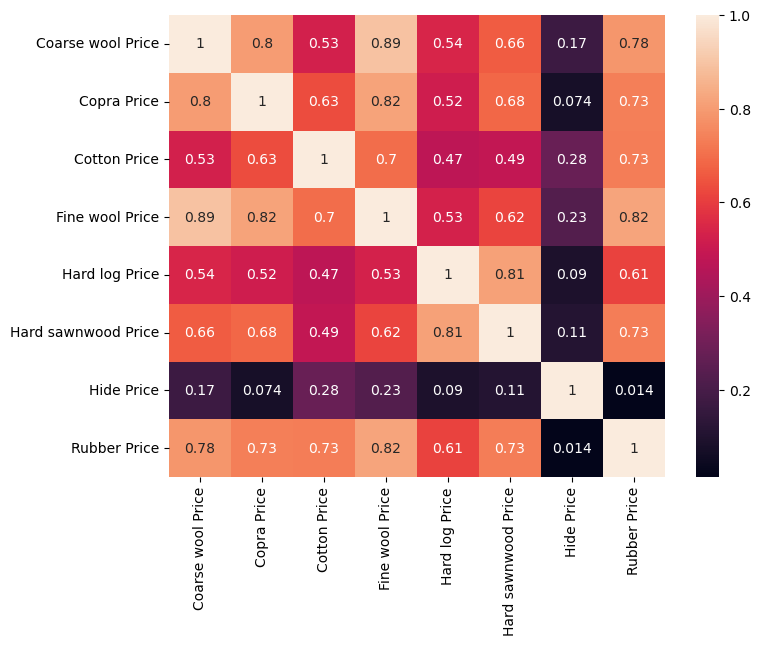

In [28]:
#Sử dụng biểu đồ Headmap hiển thị dữ liệu
plt.figure(figsize=(8,6))
sns.heatmap(corrMatrix, annot=True)
plt.show()

**NHẬN XÉT:**

1. Giá len thô (Coarse wool): Tương quan thuận với giá bán Fine wool (len mịn): 0.89, Copra (cùi dừa): 0.8
2. Giá cùi dừa (Copra) Tương quan với giá len mịn (Fine wool): 0.82
3. Giá Cotton tương quan thuận với giá cao su (Rubber): 0.73
4. Giá len min (Fine Wool) tương quan thuận mạnh với giá len thô (Coarse wool): 0.89
5. Giá gỗ cứng (Hard log) tương quan thuận với giá gỗ xẻ cứng (Hard sawnwood): 0.81
6. Giá da thú (hide) ko bị ảnh hưởng nhiều với các mặt hàng khác
7. Giá cao su (Rubber) tương quan mạnh với giá len min (Fine Wool):0.82

### 4.2 Trực quan hóa dữ liệu theo dạng chuỗi thời gian
---
#### Biểu đồ giá bán các loại nông sản

In [29]:
#Setup Màu cho các biểu đồ
colors=['#b84949', '#ff6f00', '#ffbb00', '#9dff00', '#329906', 
        '#439c55', '#67c79e', '#00a1db', '#002254', '#5313c2', 
        '#c40fdb', '#e354aa']

In [30]:
import plotly.offline as pyoff
x=0
plot_data=[]
for i in prices:
    item= go.Scatter(x=data_ok.index,y=data_ok[i],name=i,marker = dict(color = colors[x]))
    plot_data.append(item)
    x+=1
plot_layout = go.Layout(title='Overlapped Prices',yaxis_title=i,xaxis_title='Date')
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

#### Biểu đồ thay đổi giá
---

In [31]:
#Biểu đồ thể hiện mức dao động giá
import plotly.graph_objs as go
import plotly.offline as pyoff
x=0
for i in percentages:
    plot_data = [
        go.Scatter(
            x=data_raw.index,
            y=data_raw[i],
            name=i,
            marker = dict(color = colors[x])
        )
    ]
    plot_layout = go.Layout(
            title=i,
            yaxis_title=i,
            xaxis_title='Date'
        )
    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)
    x+=1

Black Monday (2011) - Ngày Thứ 2 đen tối năm ấy
Being on a movie set is like one long financial crisis. 
Khủng hoảng tài chính như đóng một bộ phim dài tập. John Cusack
Pareto nói câu kinh điển về nguyên tắc 80/20, trong tài chánh thì nguyên tắc này còn hơn thế. Những dòng dưới đây là cuộc chơi thầm lặng của 20% giới tinh hoa (elite) nhưng ảnh hưởng thì đến hơn 80% phần còn lại về nguyên nhân giá cả mặt hàng 2011 trong quan điểm mình:
1. Cuộc khủng hoảng tài chánh năm 2008 khủng khiếp nổ ra khắp nước Mỹ trước khi càn quét phần còn lại của thế giới thông qua sự thống trị đồng đô la Mỹ. Mua nhà tín chấp bỏ qua các yêu cầu cơ bản của bảo hiểm là quả bom nổ chậm và khi nó nổ thì hậu quả thì quá sức lường trước của Phố Wall lẫn sàn London. Trước áp lực của giới nhà băng, nó đẩy các chánh phủ phải tìm cách bợ đỡ nền kinh tế để cản tình trạng domino nợ xấu trong nhiều lãnh vực, đặc biệt là Bất Động Sản. Bằng việc bơm tiền qua các gói cứu trợ, khiến giá trị đồng tiền và nền kinh tế mất cân bằng nghiêm trọng. Sau Mỹ, các nước bơm tiền như nước thuỷ điện sông Đà, việc này kéo dài đến năm 2011 thì lạm phát đạt đỉnh, và vỡ bọt trắng xoá. Đây là hạt giống đầu tiền dẫn đến tai hoạ năm 2011.
2. Năm 2011, chánh quyền của Mỹ (Tổng thống, cục dự liên bang và quốc hội) đã phá bỏ trần nợ công của Mỹ. Điều này như đem sự thịnh vượng và vị thế của đồng đô la mà Mỹ giành được sau thế chiến thứ 2 đem đi mua phiếu bầu vậy. Sức mạnh ở đồng đô la nằm ở chỗ là hiện thân của nền kinh tế Mỹ và niềm tin tuyệt đối của mọi người vào nó. Quyết định khiến Mỹ hạ tín nhiệm xuống AA+, qua đó đem hàng ngàn tỷ tiền tiết kiệm của nhà đầu tư vào đỏ đen. Mình đánh giá hệ quả của nó tương tự như tài phiệt phố Wall ép chánh phủ phá bỏ chế độ bản vị Vàng và đồng đô la năm 1968. Kể từ đây, các nước khác, đặc biệt là Nga, TQ và các nước khác phát triển đồng tiền khác để thoát khỏi đô la, Bitcoin cũng hệ quả của sự kiện trên. Nguyên nhân này khiến gía cả của các mặt hàng lạm phát ở ngưỡng không tính toán được. Giá cả sau đó phải nhảy múa cùng chiều với nỗi sợ tới khi nhà đầu tư bớt sợ thì thôi.
3. Khủng hoảng nợ công Châu Âu: Khu vực Eurozone là một trong những liên kết tiềm ẩn rủi ro nhất, căn bản từ khi thành lập nguyên tắc thì tốt, nhưng sai lầm lớn là cam kết sử dụng đồng tiền Euro. Gần mấy chục nước chịu sự kiểm soát hà khắc từ một ngân hàng trung ương châu âu ECB, nhưng dù kiểu gì thì kiểu nó giống như đi chơi hụi vậy. Chủ hụi là các nước lớn và các nước nhỏ là con hụi. Điều gì đến cũng đến, năm 2011, các hụi con là Ireland, Hy Lạp đến Italy, Tây Ban Nha bể bạc dẫn đến mém vỡ hụi. Đây là phim kinh dị với các thị trường chứng khoán, đặc biệt 2 anh cả là Đức và Pháp phải xắn tay bảo kê đàn em. Giới tài phiệt London thấy viễn cảnh không sáng lạng đã tìm cách cách ly sự đổ vỡ tiềm tàng này, kéo theo sau đó là sự kiện Brexit ra đời. Cuộc khủng hoảng trên khiến giới đầu tư cực kỳ mất niềm tin vào đồng Euro,  khối EU tới giờ vẫn còn vực lộn với tàn dư năm 2011 nhưng dù gì thì gì, mùa thu năm ấy cả châu Âu sống trong buồn phiền đến não lòng.
Kết quả, ngày thứ hai 8 tháng 8 năm 2011, các chỉ số chứng khoán vỡ tung toé từ đầu cầu London đến phố Wall, kéo theo làn sóng bán tháo khắp các thị trường còn lại. Từ đồng đôla kéo theo các đồng tiền mạnh khác giá trị quay ngược về đáy hơn chục năm. Giá vàng leo một phát lên đỉnh, các mặt hàng thiết yếu như loại len sợi vải vóc, bị đẩy lên ngút trời do lo ngại khủng hoảng sẽ tăng và đồng tiền sợ sẽ thành giấy vụn. Tác động kép mà đúng hơn là chồng chất đã tạo ra một bộ data mà Thầy Nam sử dụng để giảng bài cho lớp mình.
Ngoài ra, các nguyên nhân khác như phong trào chiếm phố Wall, các ngân hàng phá sản, ... thì hầu như chỉ là muỗi đốt inox, có nhưng không phải là cốt lõi. Nếu giảm chiều dữ liệu loại bỏ các feature phụ thì theo mình chỉ có 3 nguyên nhân trên thôi. Cảm ơn đã đọc nha.
P/s: trên đây là bài phân tích của một Shipper pizza về sự kiện trên, có khá nhiều giả thuyết, thuyết âm mưu chưa chứng minh được. Anh chị em tham khảo chơi, hy vọng có thêm một góc nhìn khác.
Tham khảo:
https://en.wikipedia.org/wiki/Black_Monday_(2011)
https://vi.wikipedia.org/.../Chi%E1%BA%BFn_tranh_ti%E1%BB...
https://www.goodreads.com/.../17564252-chi-n-tranh-ti-n-t
https://vietnambiz.vn/che-do-ban-vi-vang-gold-standard-la...
https://vnexpress.net/8-su-kien-dinh-dam-cua-kinh-te-the...
https://baotintuc.vn/.../kho-khan-tai-chinh-nam-2011-so...
https://cafef.vn/.../9-su-kien-tieu-bieu-kinh-te-tai...

### 4.3) truc quan hoa 
---

In [32]:
data_raw.head()

Month  Coarse wool Price  Coarse wool price % Change  \
Date                                                                
1990-04-01  Apr-90             482.34                        0.00   
1990-05-01  May-90             447.26                       -7.27   
1990-06-01  Jun-90             440.99                       -1.40   
1990-07-01  Jul-90             418.44                       -5.11   
1990-08-01  Aug-90             418.44                        0.00   

            Copra Price  Copra price % Change  Cotton Price  \
Date                                                          
1990-04-01        236.0                  0.00          1.83   
1990-05-01        234.0                 -0.85          1.89   
1990-06-01        216.0                 -7.69          1.99   
1990-07-01        205.0                 -5.09          2.01   
1990-08-01        198.0                 -3.41          1.79   

            Cotton price % Change  Fine wool Price  Fine wool price % Change  \
Date                                                                           
1990-04-01                   0.00          1071.63                      0.00   
1990-05-01                   3.28          1057.18                     -1.35   
1990-06-01                   5.29           898.24                    -15.03   
1990-07-01                   1.01           895.83                     -0.27   
1990-08-01                 -10.95           951.22                      6.18   

            Hard log Price  Hard log price % Change  Hard sawnwood Price  \
Date                                                                       
1990-04-01          161.20                     0.00               549.91   
1990-05-01          172.86                     7.23               491.88   
1990-06-01          181.67                     5.10               495.39   
1990-07-01          187.96                     3.46               485.86   
1990-08-01          186.13                    -0.97               487.52   

            Hard sawnwood price % Change  Hide Price  Hide price % change  \
Date                                                                        
1990-04-01                          0.00      100.00                 0.00   
1990-05-01                        -10.55       99.46                -0.54   
1990-06-01                          0.71       97.90                -1.57   
1990-07-01                         -1.92       96.75                -1.17   
1990-08-01                          0.34       91.89                -5.02   

            Rubber Price  Rubber price % Change  month  year  
Date                                                          
1990-04-01          0.84                   0.00      4  1990  
1990-05-01          0.85                   1.19      5  1990  
1990-06-01          0.85                   0.00      6  1990  
1990-07-01          0.86                   1.18      7  1990  
1990-08-01          0.88                   2.33      8  1990

In [33]:
df= data_raw.iloc[:, lambda df: [5, 6, 9, 10]]
df

Cotton Price  Cotton price % Change  Hard log Price  \
Date                                                              
1990-04-01          1.83                   0.00          161.20   
1990-05-01          1.89                   3.28          172.86   
1990-06-01          1.99                   5.29          181.67   
1990-07-01          2.01                   1.01          187.96   
1990-08-01          1.79                 -10.95          186.13   
...                  ...                    ...             ...   
2019-12-01          1.67                   1.21          272.80   
2020-01-01          1.74                   4.19          272.40   
2020-02-01          1.69                  -2.87          270.56   
2020-03-01          1.49                 -11.83          276.93   
2020-04-01          1.40                  -6.04          276.24   

            Hard log price % Change  
Date                                 
1990-04-01                     0.00  
1990-05-01                     7.23  
1990-06-01                     5.10  
1990-07-01                     3.46  
1990-08-01                    -0.97  
...                             ...  
2019-12-01                    -0.22  
2020-01-01                    -0.15  
2020-02-01                    -0.68  
2020-03-01                     2.35  
2020-04-01                    -0.25  

[361 rows x 4 columns]

### 4.3.1 Trực quan hóa Giá cotton

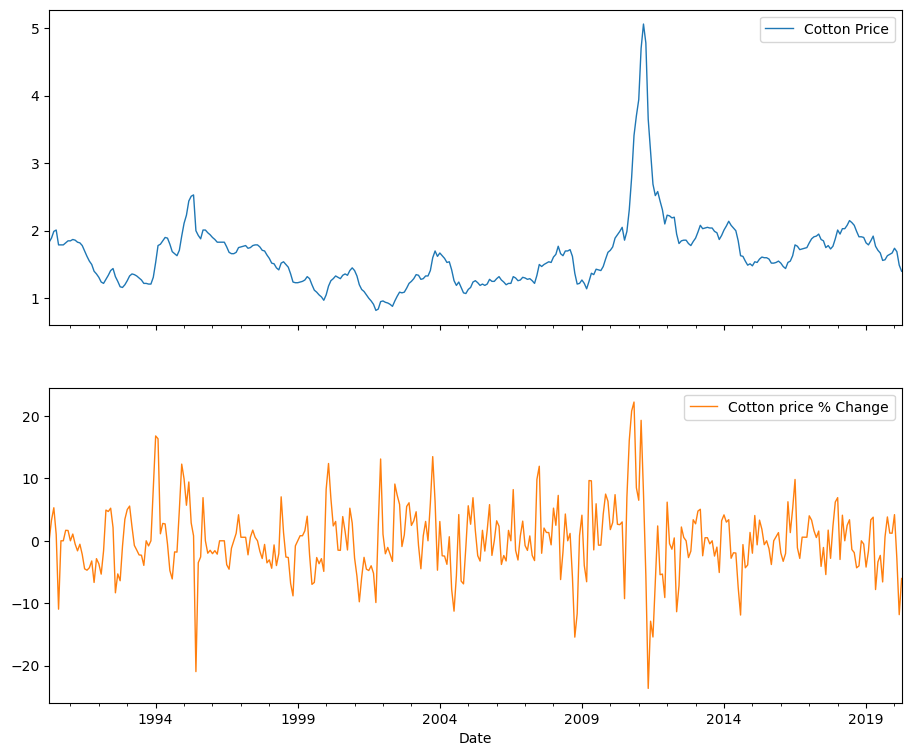

In [34]:
axes = df[["Cotton Price", "Cotton price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

<AxesSubplot:>

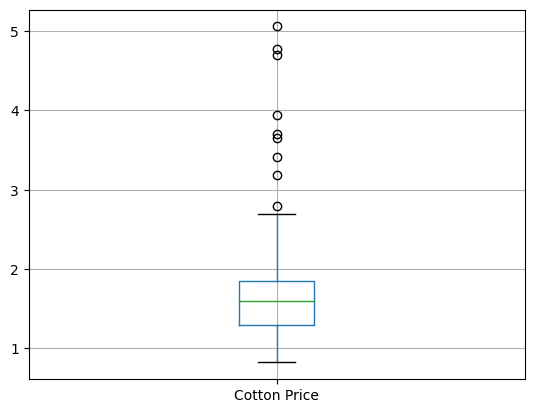

In [35]:
# nhom dl theo vung cua gia san pham
df[["Cotton Price"]].boxplot()

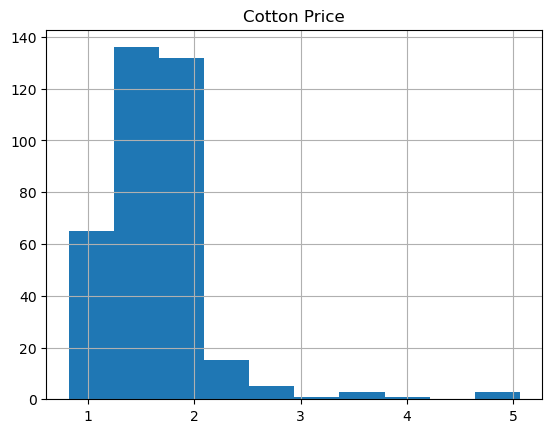

In [36]:
df[["Cotton Price"]].hist();

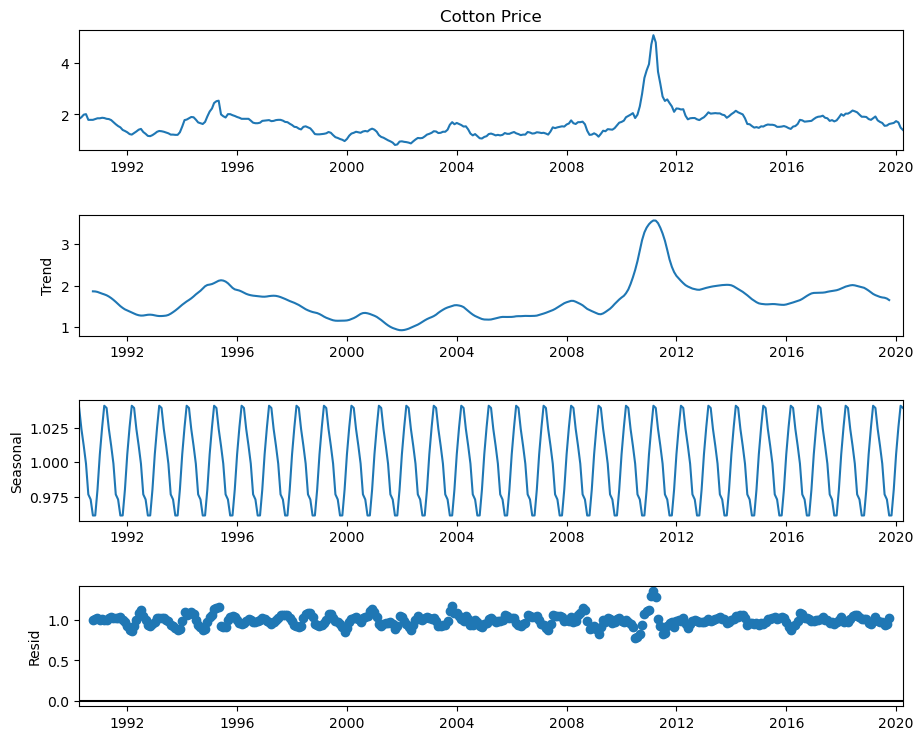

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Cotton Price"], model='multiplicative')
fig = result.plot()
fig.set_size_inches(10, 8)
#su huong - mua vu - biên độ giao động

---

### 4.1.2 Trực quan hóa Giá gỗ cứng

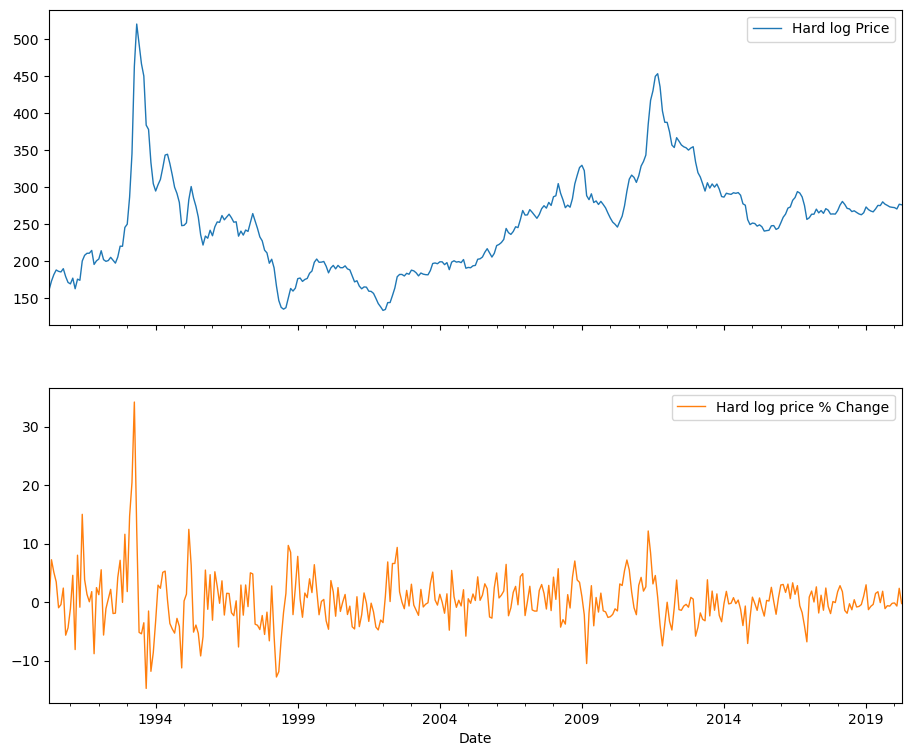

In [38]:
axes = df[["Hard log Price", "Hard log price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

<AxesSubplot:>

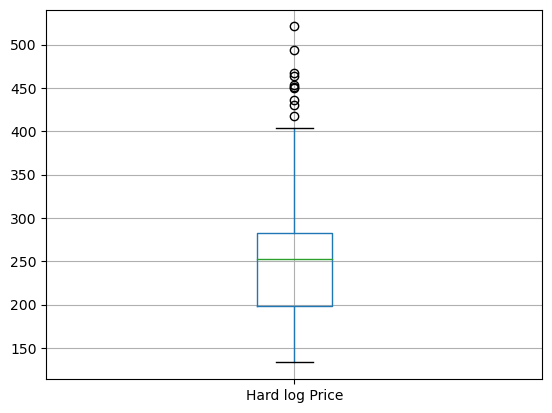

In [39]:
# nhom dl theo vung cua gia san pham
df[["Hard log Price"]].boxplot()

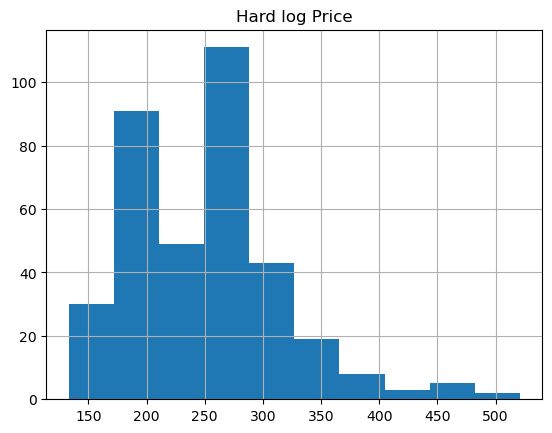

In [40]:
df[["Hard log Price"]].hist();

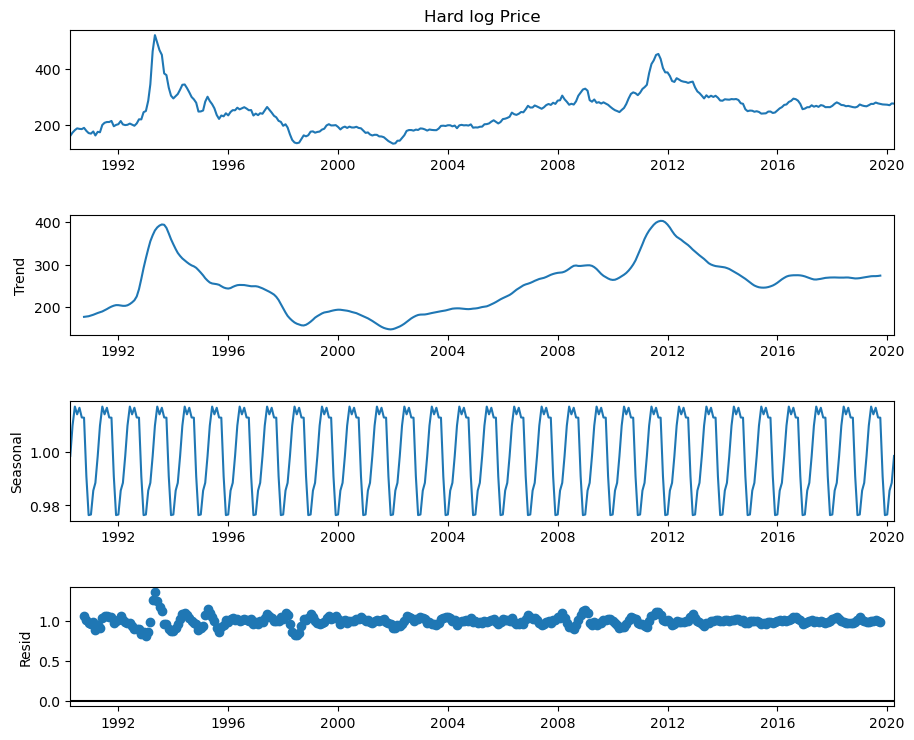

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Hard log Price"], model='multiplicative')
fig = result.plot()
fig.set_size_inches(10, 8)
#su huong - mua vu - biên độ giao động

# 5) Xử lý dữ liệu cho bài toán dự báo

5.1 Tách dữ liệu gỗ để xây dựng tập train - test

5.2 Scale the data

5.3 tạo vòng lặp với 12 tháng dự đoán 1 tháng

### 5.1 Tách dữ liệu gỗ để xây dựng tập train - test

In [42]:
#Tách dữ liệu lấy các cột Hard log (Giá gỗ cứng)
Hard_log_Price = data_raw.iloc[:, lambda df: [9]]
Hard_log_Price

Hard log Price
Date                      
1990-04-01          161.20
1990-05-01          172.86
1990-06-01          181.67
1990-07-01          187.96
1990-08-01          186.13
...                    ...
2019-12-01          272.80
2020-01-01          272.40
2020-02-01          270.56
2020-03-01          276.93
2020-04-01          276.24

[361 rows x 1 columns]

In [43]:
# tạo data
data = Hard_log_Price
# lấy giá trị của bảng 
dataset = data.values

In [44]:
# lấy 310 dòng ra làm train
train = dataset[:310]

### 5.2 Scale the data

In [45]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

len(scaled_data)

361

In [46]:
scaled_data[:5]

array([[0.07204604],
       [0.10213403],
       [0.12486775],
       [0.14109875],
       [0.13637654]])

In [47]:
train_data = scaled_data[0:len(train), :]
train_data

array([[0.07204604],
       [0.10213403],
       [0.12486775],
       [0.14109875],
       [0.13637654],
       [0.13431218],
       [0.14574356],
       [0.11802957],
       [0.09766986],
       [0.09266379],
       [0.11263644],
       [0.07558125],
       [0.10917864],
       [0.10517895],
       [0.17255438],
       [0.1923464 ],
       [0.19944262],
       [0.19972647],
       [0.20942895],
       [0.16055531],
       [0.17301886],
       [0.17952159],
       [0.20839677],
       [0.17722499],
       [0.17131577],
       [0.17410265],
       [0.18535339],
       [0.1749542 ],
       [0.16507109],
       [0.18643718],
       [0.22429231],
       [0.22398266],
       [0.28978402],
       [0.30111217],
       [0.39589193],
       [0.54720925],
       [0.85188243],
       [1.        ],
       [0.93035378],
       [0.86119784],
       [0.81849147],
       [0.64696927],
       [0.63182205],
       [0.51629551],
       [0.44223673],
       [0.41689676],
       [0.43885635],
       [0.457

### 5.3 tạo vòng lặp với 12 tháng dự đoán 1 tháng

<img src='Pic/vldata.png' width='500px'>

In [48]:
x_train = []
y_train = []
# tạo vòng lặp với 12 tháng 
for i in range(12, len(train_data)):
    x_train.append(train_data[i-12:i, 0])
    y_train.append(train_data[i, 0])
    
# dưa ve dạng numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data ve mang 1 chieu
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [49]:
x_train[:2]

array([[[0.07204604],
        [0.10213403],
        [0.12486775],
        [0.14109875],
        [0.13637654],
        [0.13431218],
        [0.14574356],
        [0.11802957],
        [0.09766986],
        [0.09266379],
        [0.11263644],
        [0.07558125]],

       [[0.10213403],
        [0.12486775],
        [0.14109875],
        [0.13637654],
        [0.13431218],
        [0.14574356],
        [0.11802957],
        [0.09766986],
        [0.09266379],
        [0.11263644],
        [0.07558125],
        [0.10917864]]])

In [50]:
y_train[:2]

array([0.10917864, 0.10517895])

# 6) Xây dựng mạng nơ-ron

6.1 Tinh chỉnh tham số

6.2 Tăng số chiều của thuật toán 

6.3 Sử dụng trình tối ưu hóa cho mạng

6.4 Mạng nơ-ron LSTM trong dự đoán

6.5 Test 

6.6 Đánh giá tập train

6.7 Đánh giá tập test

 6.8 dự đoán trên tập dự đoán 

In [51]:
# import thư viện
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Bidirectional,Embedding
from keras.models import load_model, Model

from collections import Counter # Đếm đối tượng 
from tensorflow.keras.callbacks import ModelCheckpoint # lưu model tốt nhất

<img src='Pic/a.jpg' width='500px'>

In [52]:
# Xây dựng mạng nơ-ron đơn giản
model_lstm = Sequential()
#Xây dungje lớp mạng nơ-ron LSTM với số chiều là 64
model_lstm.add(LSTM(32,input_shape =(12,1)))
# dropout trách việc học tủ của mạng 
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))
# Sai số toàn phương trung bình mse
# Sai số toàn phương trung bình mean_squared_error
model_lstm.compile(loss = 'mse', metrics = [['acc']])
model_lstm.summary()

# mạng nơ- ron học 
model_lstm.fit(x_train,y_train,epochs = 10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
10/10 [==============================] - 3s 9ms/step - loss: 0.0553 - acc: 0.0034
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 0.0145 - acc: 0.0034
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.0139 - acc: 0.0034
Epoch 4/10
10/10 [=====================

### 6.1 Tinh chỉnh tham số

In [53]:
# Xây dựng mạng nơ-ron đơn giản
model_lstm1 = Sequential()
#Xây dựng lớp mạng nơ-ron LSTM với số chiều là 64
model_lstm1.add(LSTM(64,input_shape =(12,1)))
# dropout trách việc học tủ của mạng 
model_lstm1.add(Dropout(0.2))
# đầu ra của mạng sẽ là 1
model_lstm1.add(Dense(1))
# trả về kết quả xây dụng ,tính toán mạng nơ-ron
# Sai số toàn phương trung bình mse
# Sai số toàn phương trung bình mean_squared_error
model_lstm1.compile(loss = 'mse', metrics = [['acc']])
# thông tin của mạng.
model_lstm1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_lstm1.fit(x_train,y_train, batch_size = 4096,epochs = 10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.1728 - acc: 0.0034
Epoch 2/10
1/1 [==============================] - 0s 24ms/step - loss: 0.1075 - acc: 0.0034
Epoch 3/10
1/1 [==============================] - 0s 24ms/step - loss: 0.0738 - acc: 0.0034
Epoch 4/10
1/1 [==============================] - 0s 27ms/step - loss: 0.0474 - acc: 0.0034
Epoch 5/10
1/1 [==============================] - 0s 24ms/step - loss: 0.0316 - acc: 0.0034
Epoch 6/10
1/1 [==============================] - 0s 24ms/step - loss: 0.0212 - acc: 0.0034
Epoch 7/10
1/1 [==============================] - 0s 23ms/step - loss: 0.0154 - acc: 0.0034
Epoch 8/10
1/1 [==============================] - 0s 22ms/step - loss: 0.0155 - acc: 0.0034
Epoch 9/10
1/1 [==============================] - 0s 22ms/step - loss: 0.0142 - acc: 0.0034
Epoch 10/10
1/1 [==============================] - 0s 21ms/step - loss: 0.0156 - acc: 0.0034


### 6.2 Tăng số chiều của thuật toán 

In [55]:
# Xây dựng mạng nơ-ron đơn giản
model_lstm2 = Sequential()
#Xây dựng lớp mạng nơ-ron LSTM với số chiều là 64
model_lstm2.add(LSTM(64,return_sequences=True,input_shape =(12,1)))
#Xây dựng lớp mạng nơ-ron LSTM với số chiều là 32
model_lstm2.add(LSTM(32))
# dropout trách việc học tủ của mạng 
model_lstm2.add(Dropout(0.2))
model_lstm2.add(Dense(16))
model_lstm2.add(Dense(1))

model_lstm2.compile(loss = 'mse', metrics = [['acc']])
model_lstm2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 64)            16896     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [56]:
model_lstm2.fit(x_train,y_train, batch_size = 4096,epochs = 10)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.1291 - acc: 0.0034
Epoch 2/10
1/1 [==============================] - 0s 42ms/step - loss: 0.0683 - acc: 0.0034
Epoch 3/10
1/1 [==============================] - 0s 41ms/step - loss: 0.0345 - acc: 0.0034
Epoch 4/10
1/1 [==============================] - 0s 39ms/step - loss: 0.0183 - acc: 0.0034
Epoch 5/10
1/1 [==============================] - 0s 35ms/step - loss: 0.0158 - acc: 0.0034
Epoch 6/10
1/1 [==============================] - 0s 38ms/step - loss: 0.0151 - acc: 0.0034
Epoch 7/10
1/1 [==============================] - 0s 38ms/step - loss: 0.0162 - acc: 0.0034
Epoch 8/10
1/1 [==============================] - 0s 36ms/step - loss: 0.0158 - acc: 0.0034
Epoch 9/10
1/1 [==============================] - 0s 37ms/step - loss: 0.0152 - acc: 0.0034
Epoch 10/10
1/1 [==============================] - 0s 36ms/step - loss: 0.0142 - acc: 0.0034


### 6.3 Sử dụng trình tối ưu hóa cho mạng

In [57]:
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers import Adagrad
#from tensorflow.keras.optimizers import RMSprop
#from tensorflow.keras.optimizers import Adadelta
#from tensorflow.keras.optimizers import Adamax
#from tensorflow.keras.optimizers import Nadam
#from tensorflow.keras.optimizers import Ftrl
#from tensorflow.keras.optimizers import SGD

Các lợi ích của thuật toán Adam

Không khó khăn để implement

Độ phức tạp hiệu quả

Ít bộ nhớ yêu cầu.

Thích hợp với các bài toán có độ biến thiên không ổn định và dữ liệu traning phân mảnh.

Các siêu tham số được biến thiên một cách hiệu quả và yêu cầu ít điều chỉnh


---
learning_rate : A Tensor, giá trị dấu phẩy động, hoặc lịch biểu là a tf.keras.optimizers.schedules.LearningRateSchedule, hoặc có thể gọi mà không có đối số và trả về giá trị thực tế để sử dụng, Tốc độ học tập. Mặc định là 0,001.
    
beta_1 : Giá trị float hoặc tensor float không đổi hoặc có thể gọi không nhận đối số và trả về giá trị thực để sử dụng. Tỷ lệ phân rã theo cấp số nhân cho các ước tính thời điểm đầu tiên. Mặc định là 0,9.
    
beta_2 : Giá trị float hoặc tensor float không đổi hoặc có thể gọi không có đối số và trả về giá trị thực tế để sử dụng, Tốc độ giảm dần theo cấp số nhân cho thời điểm thứ 2 ước tính. Mặc định là 0,999.
    
epsilon : Một hằng số nhỏ để ổn định số. Epsilon này là "mũ epsilon" trong bài báo Kingma và Ba (trong công thức ngay trước Phần 2.1), không phải epsilon trong Thuật toán 1 của bài báo. Mặc định là 1e-7.
    
amsgrad : Boolean. Có áp dụng biến thể AMSGrad của thuật toán này từ bài báo "Về sự hội tụ của Adam và xa hơn" hay không. Mặc định là False.

### 6.4 Mạng nơ-ron LSTM trong dự đoán

<img src='Pic/b.jpg' width='500px'>

In [58]:
# Xây dựng mạng nơ-ron đơn giản
model_lstm3 = Sequential()
#Xây dựng lớp mạng nơ-ron LSTM với số chiều là 64
model_lstm3.add(LSTM(64,return_sequences=True,input_shape =(12,1)))
model_lstm3.add(LSTM(32))
# dropout trách việc học tủ của mạng 
model_lstm3.add(Dropout(0.2))
model_lstm3.add(Dense(16))
model_lstm3.add(Dense(1))

adam =Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam')
model_lstm3.compile(loss = 'mse',optimizer = adam, metrics = [['acc']])
model_lstm3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 12, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [60]:
save_mode4 = "save_model.hdf5"
best_mode4 = ModelCheckpoint(save_mode4,monitor='loss',verbose=2,save_best_only=True,mode='auto')
lstm_mode4 = model_lstm3.fit(x_train,y_train,epochs = 100,verbose=2,callbacks=[best_mode4])

Epoch 1/100

Epoch 1: loss improved from inf to 0.00315, saving model to save_model.hdf5
10/10 - 0s - loss: 0.0031 - acc: 0.0067 - 171ms/epoch - 17ms/step
Epoch 2/100

Epoch 2: loss did not improve from 0.00315
10/10 - 0s - loss: 0.0033 - acc: 0.0067 - 107ms/epoch - 11ms/step
Epoch 3/100

Epoch 3: loss did not improve from 0.00315
10/10 - 0s - loss: 0.0035 - acc: 0.0067 - 121ms/epoch - 12ms/step
Epoch 4/100

Epoch 4: loss did not improve from 0.00315
10/10 - 0s - loss: 0.0036 - acc: 0.0067 - 123ms/epoch - 12ms/step
Epoch 5/100

Epoch 5: loss improved from 0.00315 to 0.00281, saving model to save_model.hdf5
10/10 - 0s - loss: 0.0028 - acc: 0.0067 - 157ms/epoch - 16ms/step
Epoch 6/100

Epoch 6: loss did not improve from 0.00281
10/10 - 0s - loss: 0.0035 - acc: 0.0067 - 114ms/epoch - 11ms/step
Epoch 7/100

Epoch 7: loss did not improve from 0.00281
10/10 - 0s - loss: 0.0035 - acc: 0.0067 - 123ms/epoch - 12ms/step
Epoch 8/100

Epoch 8: loss did not improve from 0.00281
10/10 - 0s - loss: 0

Epoch 64/100

Epoch 64: loss did not improve from 0.00157
10/10 - 0s - loss: 0.0017 - acc: 0.0067 - 124ms/epoch - 12ms/step
Epoch 65/100

Epoch 65: loss improved from 0.00157 to 0.00146, saving model to save_model.hdf5
10/10 - 0s - loss: 0.0015 - acc: 0.0067 - 150ms/epoch - 15ms/step
Epoch 66/100

Epoch 66: loss did not improve from 0.00146
10/10 - 0s - loss: 0.0017 - acc: 0.0067 - 126ms/epoch - 13ms/step
Epoch 67/100

Epoch 67: loss did not improve from 0.00146
10/10 - 0s - loss: 0.0015 - acc: 0.0067 - 125ms/epoch - 12ms/step
Epoch 68/100

Epoch 68: loss did not improve from 0.00146
10/10 - 0s - loss: 0.0018 - acc: 0.0067 - 115ms/epoch - 11ms/step
Epoch 69/100

Epoch 69: loss did not improve from 0.00146
10/10 - 0s - loss: 0.0020 - acc: 0.0067 - 133ms/epoch - 13ms/step
Epoch 70/100

Epoch 70: loss did not improve from 0.00146
10/10 - 0s - loss: 0.0015 - acc: 0.0067 - 119ms/epoch - 12ms/step
Epoch 71/100

Epoch 71: loss did not improve from 0.00146
10/10 - 0s - loss: 0.0016 - acc: 0.00

In [61]:
lstm_mode4=load_model('save_model.hdf5')

### 6.5 test

In [62]:
# tạo tạp test
test_data = scaled_data[len(train)-1:]
test_data[:5]

array([[0.30573117],
       [0.32529095],
       [0.33633525],
       [0.35718525],
       [0.36123655]])

In [63]:
len(test_data)

52

In [64]:
test_data = scaled_data[len(train) - 12: , :]
test_data[:5]

array([[0.30348618],
       [0.29427399],
       [0.29876397],
       [0.29215803],
       [0.27690759]])

In [65]:
x_test = []
y_test = dataset[len(train):, :]
for i in range(12, len(test_data)):
    x_test.append(test_data[i-12:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = lstm_mode4.predict(x_test)
predictions = scaler.inverse_transform(predictions)


2/2 [==============================] - 1s 7ms/step


In [66]:
# Plot the data
train = Hard_log_Price[:1+len(train)]
valid = Hard_log_Price[len(train)-1:]
valid['Predictions'] = predictions
# Visualize the data

In [67]:
valid

Hard log Price  Predictions
Date                                   
2016-02-01          259.34   255.651871
2016-03-01          263.62   265.631958
2016-04-01          271.70   271.064392
2016-05-01          273.27   278.376709
2016-06-01          282.26   279.828888
2016-07-01          285.98   287.527893
2016-08-01          294.03   291.965820
2016-09-01          292.15   299.524139
2016-10-01          286.86   297.215057
2016-11-01          275.14   289.221130
2016-12-01          256.42   275.377106
2017-01-01          258.60   255.006241
2017-02-01          263.45   255.962250
2017-03-01          263.48   266.012024
2017-04-01          270.34   269.604218
2017-05-01          265.28   276.234009
2017-06-01          268.39   271.418671
2017-07-01          264.62   271.980286
2017-08-01          270.96   268.548676
2017-09-01          268.93   274.235779
2017-10-01          263.62   273.936005
2017-11-01          263.85   267.461700
2017-12-01          263.62   266.180511
2018-01-01          268.30   266.825104
2018-02-01          275.80   272.348419
2018-03-01          280.72   281.476471
2018-04-01          276.70   287.499146
2018-05-01          271.38   282.309235
2018-06-01          270.59   273.995270
2018-07-01          267.02   271.942108
2018-08-01          268.10   269.405701
2018-09-01          265.85   270.860687
2018-10-01          263.85   269.680603
2018-11-01          262.71   267.394531
2018-12-01          265.43   266.020264
2019-01-01          273.25   269.034271
2019-02-01          269.71   278.238098
2019-03-01          267.74   275.979553
2019-04-01          266.66   271.601257
2019-05-01          270.59   269.471283
2019-06-01          275.39   273.792542
2019-07-01          275.11   280.300751
2019-08-01          280.19   280.663879
2019-09-01          277.06   284.723602
2019-10-01          275.34   281.674500
2019-11-01          273.40   278.304413
2019-12-01          272.80   275.913940
2020-01-01          272.40   275.504120
2020-02-01          270.56   275.680450
2020-03-01          276.93   274.114105
2020-04-01          276.24   280.611053

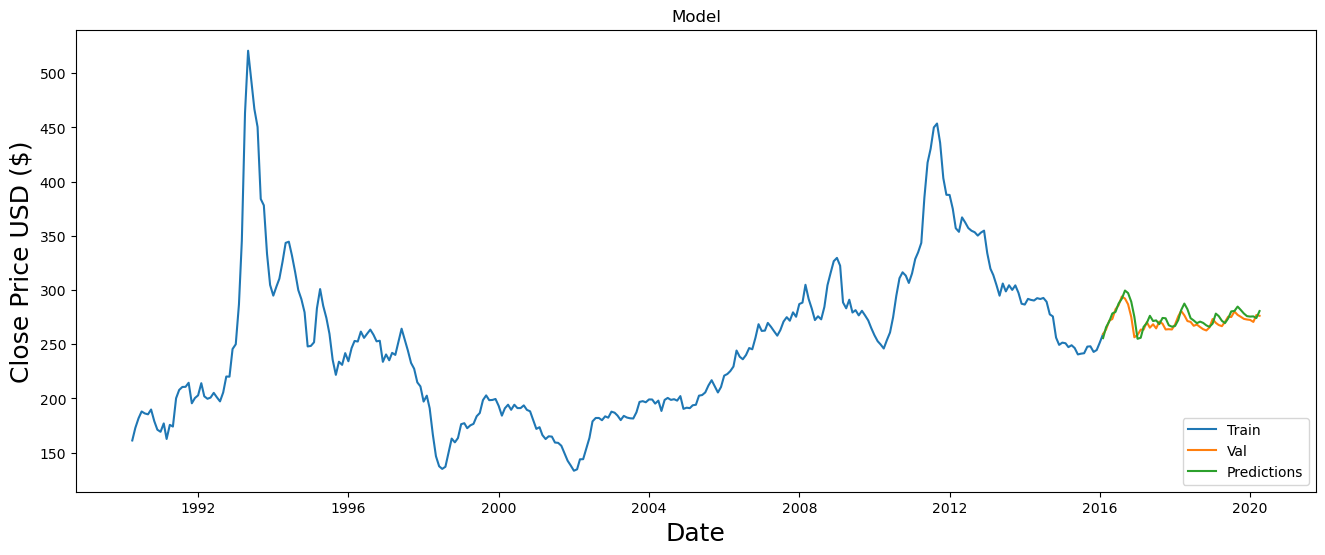

In [68]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Hard log Price'])
plt.plot(valid[['Hard log Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [69]:
# thu nhỏ bản đồ

In [70]:
model_train = train[250:]

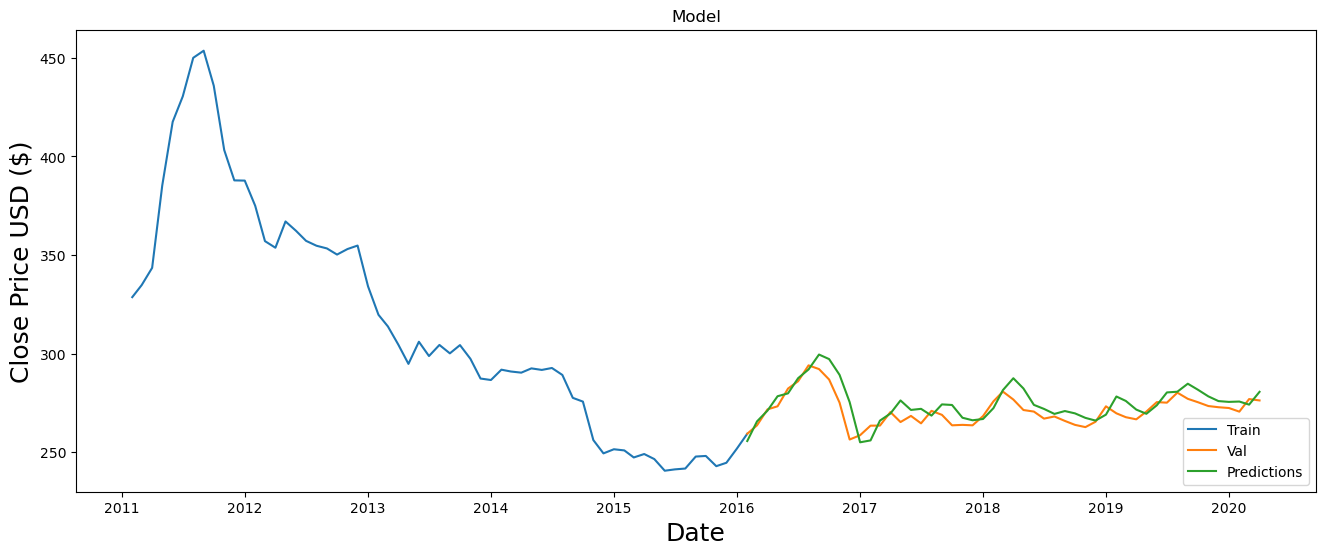

In [71]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(model_train['Hard log Price'])
plt.plot(valid[['Hard log Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### 6.6 Đánh giá tập test

In [72]:
# Sai số toàn phương trung bình
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(valid['Hard log Price'], valid['Predictions'])
print(" Sai số toàn phương trung bình ")
mse

 Sai số toàn phương trung bình 


38.708678311612786

In [73]:
# Sai số toàn phương trung bình
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(" Sai số toàn phương trung bình ")
rmse

 Sai số toàn phương trung bình 


6.2216298758133135

In [74]:
# hệ số sác định 
from sklearn.metrics import r2_score
r2 = r2_score(valid['Hard log Price'], valid['Predictions'])
print(" hệ số sác định  ")
r2

 hệ số sác định  


0.37524079088139506

In [75]:
# sai số trung bình tuyệt đối 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(valid['Hard log Price'], valid['Predictions'])
print(" sai số trung bình tuyệt đối  ")
mae

 sai số trung bình tuyệt đối  


4.961657475490194

### 6.8 dự đoán trên tập dự đoán 

In [76]:
data_pri = scaled_data[-12:]
#data_pri =np.reshape(data_pri,(1,12,1)) 
#data_pri =np.reshape(data_pri, shape=(1, 12, 1)) 
print(data_pri.shape)
print(data_pri)

(12, 1)
[[0.35432096]
 [0.36670709]
 [0.36598457]
 [0.37909323]
 [0.37101644]
 [0.36657807]
 [0.36157201]
 [0.36002374]
 [0.35899156]
 [0.35424354]
 [0.37068098]
 [0.36890047]]


<img src='Pic/vldatapre.png' width='500px'>

In [77]:
#df_12
a=0
data_pri = scaled_data[-12:]

while a <=1:
    s = data_pri[-12:]
    predictions = lstm_mode4.predict(np.reshape(s,(1,12,1)))
    print(predictions)
    data_pri = np.append(data_pri,predictions)
    a=a+1

1/1 [==============================] - 0s 24ms/step
[[0.38245243]]
1/1 [==============================] - 0s 25ms/step
[[0.39426064]]


In [78]:
# reshape data vê dạng 1 chiều
data_pri = np.reshape(data_pri,(len(data_pri),1))

In [79]:
# scale gia tri du doan
predictions1 = scaler.inverse_transform(data_pri)
len(predictions1)

14

In [80]:
#ép giá trị và cột valid
validpre1 = Hard_log_Price[-len(data_pri):]
validpre1['Hard log Price']=predictions1
validpre1

Hard log Price
Date                      
2019-03-01      270.590000
2019-04-01      275.390000
2019-05-01      275.110000
2019-06-01      280.190000
2019-07-01      277.060000
2019-08-01      275.340000
2019-09-01      273.400000
2019-10-01      272.800000
2019-11-01      272.400000
2019-12-01      270.560000
2020-01-01      276.930000
2020-02-01      276.240000
2020-03-01      281.491790
2020-04-01      286.067828

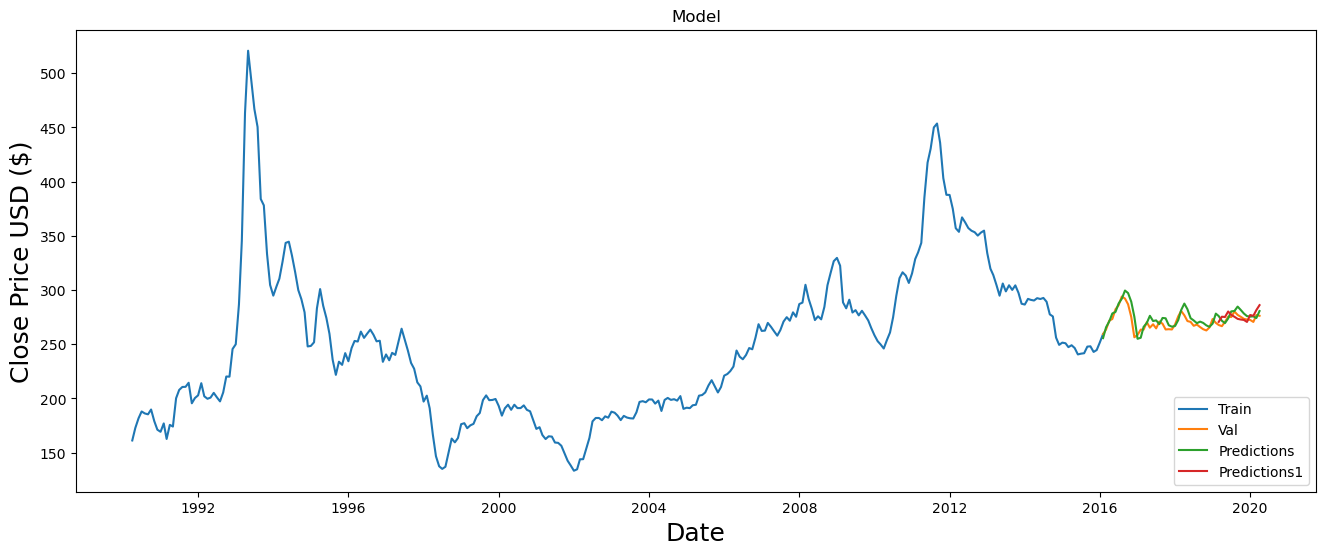

In [81]:
# trực quan hóa lại biểu đồ 
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Hard log Price'])
plt.plot(valid[['Hard log Price', 'Predictions']])
plt.plot(validpre1['Hard log Price'])
plt.legend(['Train', 'Val', 'Predictions','Predictions1'], loc='lower right')
plt.show()

In [82]:
model_train1 = train[280:]

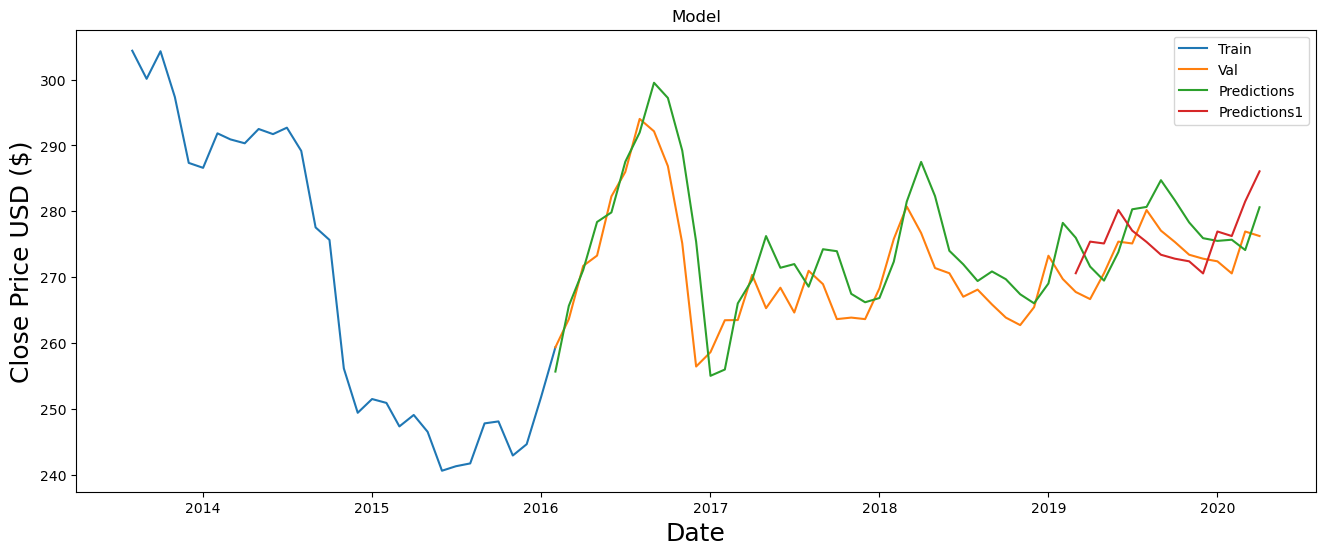

In [83]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(model_train1['Hard log Price'])
plt.plot(valid[['Hard log Price', 'Predictions']])
plt.plot(validpre1['Hard log Price'])
plt.legend(['Train', 'Val', 'Predictions','Predictions1'])
plt.show()

# 7) Dự báo trên tập dữ liệu mới

In [84]:
#Tách dữ liệu lấy các cột Hard log (Giá gỗ cứng)
Cotton_Price = data_raw.iloc[:, lambda df: [5]]
Cotton_Price

Cotton Price
Date                    
1990-04-01          1.83
1990-05-01          1.89
1990-06-01          1.99
1990-07-01          2.01
1990-08-01          1.79
...                  ...
2019-12-01          1.67
2020-01-01          1.74
2020-02-01          1.69
2020-03-01          1.49
2020-04-01          1.40

[361 rows x 1 columns]

In [85]:
# tạo data
data = Cotton_Price
# lấy giá trị của bảng 
dataset = data.values

# lấy 310 dòng ra làm train
train_cotton = dataset[:310]

In [86]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

len(scaled_data)

scaled_data[:5]

train_data = scaled_data[0:len(train), :]
train_data

array([[0.23820755],
       [0.25235849],
       [0.2759434 ],
       [0.28066038],
       [0.22877358],
       [0.22877358],
       [0.22877358],
       [0.23584906],
       [0.24292453],
       [0.24292453],
       [0.24764151],
       [0.24528302],
       [0.23820755],
       [0.23584906],
       [0.22641509],
       [0.20754717],
       [0.18867925],
       [0.17216981],
       [0.16037736],
       [0.13679245],
       [0.12735849],
       [0.11556604],
       [0.0990566 ],
       [0.09433962],
       [0.10849057],
       [0.12264151],
       [0.13915094],
       [0.14622642],
       [0.11792453],
       [0.10141509],
       [0.08254717],
       [0.08018868],
       [0.08962264],
       [0.10377358],
       [0.12028302],
       [0.12735849],
       [0.125     ],
       [0.12028302],
       [0.11320755],
       [0.10613208],
       [0.09433962],
       [0.09433962],
       [0.09198113],
       [0.09198113],
       [0.11556604],
       [0.16745283],
       [0.22641509],
       [0.231

In [87]:
x_train = []
y_train = []
# tạo vòng lặp với 12 tháng 
for i in range(12, len(train_data)):
    x_train.append(train_data[i-12:i, 0])
    y_train.append(train_data[i, 0])
    
# dưa ve dạng numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data ve mang 1 chieu
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [88]:
save_mode4 = "save_model.hdf5"
best_mode4 = ModelCheckpoint(save_mode4,monitor='loss',verbose=2,save_best_only=True,mode='auto')
lstm_mode4 = model_lstm3.fit(x_train,y_train,epochs = 50,verbose=2,callbacks=[best_mode4])

Epoch 1/50

Epoch 1: loss improved from inf to 0.00097, saving model to save_model.hdf5
10/10 - 0s - loss: 9.7184e-04 - acc: 0.0067 - 165ms/epoch - 17ms/step
Epoch 2/50

Epoch 2: loss did not improve from 0.00097
10/10 - 0s - loss: 9.9080e-04 - acc: 0.0067 - 131ms/epoch - 13ms/step
Epoch 3/50

Epoch 3: loss did not improve from 0.00097
10/10 - 0s - loss: 0.0010 - acc: 0.0067 - 123ms/epoch - 12ms/step
Epoch 4/50

Epoch 4: loss improved from 0.00097 to 0.00087, saving model to save_model.hdf5
10/10 - 0s - loss: 8.6821e-04 - acc: 0.0067 - 174ms/epoch - 17ms/step
Epoch 5/50

Epoch 5: loss did not improve from 0.00087
10/10 - 0s - loss: 8.7609e-04 - acc: 0.0067 - 112ms/epoch - 11ms/step
Epoch 6/50

Epoch 6: loss did not improve from 0.00087
10/10 - 0s - loss: 9.1110e-04 - acc: 0.0067 - 116ms/epoch - 12ms/step
Epoch 7/50

Epoch 7: loss improved from 0.00087 to 0.00086, saving model to save_model.hdf5
10/10 - 0s - loss: 8.5887e-04 - acc: 0.0067 - 156ms/epoch - 16ms/step
Epoch 8/50

Epoch 8: l

In [89]:
lstm_mode4=load_model('save_model.hdf5')

In [90]:
# tạo tạp test
test_data = scaled_data[len(train)-1:]
test_data[:5]

array([[0.15330189],
       [0.14622642],
       [0.16745283],
       [0.17216981],
       [0.19103774]])

In [91]:
test_data = scaled_data[len(train) - 12: , :]
test_data[:5]

array([[0.16745283],
       [0.17924528],
       [0.18632075],
       [0.18396226],
       [0.18396226]])

In [92]:
x_test = []
y_test = dataset[len(train):, :]
for i in range(12, len(test_data)):
    x_test.append(test_data[i-12:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = lstm_mode4.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 16ms/step


0.07077821062938422

In [93]:
# Plot the data
train = Cotton_Price[:1+len(train)]
valid1 = Cotton_Price[len(train)-1:]
valid1['Predictions'] = predictions
# Visualize the data

In [94]:
valid1

Cotton Price  Predictions
Date                                 
2016-03-01          1.44     1.455071
2016-04-01          1.53     1.419734
2016-05-01          1.55     1.521000
2016-06-01          1.63     1.560599
2016-07-01          1.79     1.640132
2016-08-01          1.77     1.817021
2016-09-01          1.72     1.789663
2016-10-01          1.73     1.705380
2016-11-01          1.74     1.709079
2016-12-01          1.75     1.730012
2017-01-01          1.82     1.744321
2017-02-01          1.88     1.822498
2017-03-01          1.91     1.890645
2017-04-01          1.92     1.914195
2017-05-01          1.95     1.913120
2017-06-01          1.87     1.941018
2017-07-01          1.85     1.845873
2017-08-01          1.75     1.819419
2017-09-01          1.78     1.716957
2017-10-01          1.73     1.755438
2017-11-01          1.77     1.715150
2017-12-01          1.88     1.758064
2018-01-01          2.01     1.890705
2018-02-01          1.95     2.038971
2018-03-01          2.03     1.946363
2018-04-01          2.03     2.017801
2018-05-01          2.08     2.020553
2018-06-01          2.15     2.071855
2018-07-01          2.12     2.151546
2018-08-01          2.08     2.102553
2018-09-01          1.99     2.045113
2018-10-01          1.91     1.944534
2018-11-01          1.91     1.863132
2018-12-01          1.90     1.880666
2019-01-01          1.82     1.883484
2019-02-01          1.79     1.792626
2019-03-01          1.85     1.758303
2019-04-01          1.92     1.838618
2019-05-01          1.77     1.927745
2019-06-01          1.71     1.746754
2019-07-01          1.67     1.663852
2019-08-01          1.56     1.636394
2019-09-01          1.57     1.529497
2019-10-01          1.63     1.541604
2019-11-01          1.65     1.625543
2019-12-01          1.67     1.656273
2020-01-01          1.74     1.670342
2020-02-01          1.69     1.742658
2020-03-01          1.49     1.686123
2020-04-01          1.40     1.455005

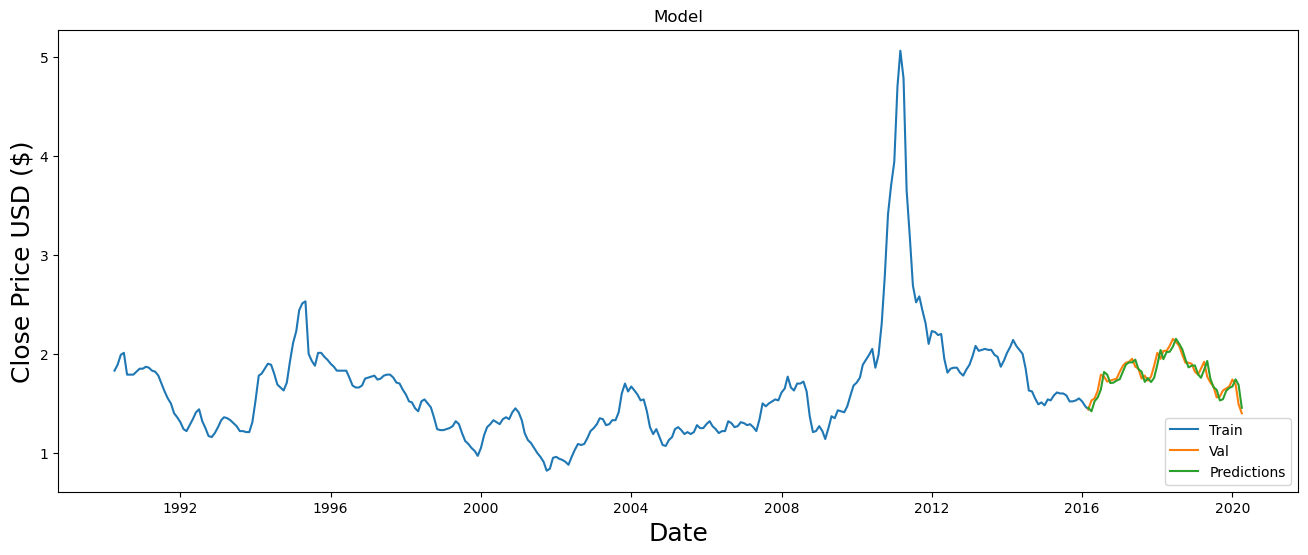

In [95]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Cotton Price'])
plt.plot(valid1[['Cotton Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### 7.1 đánh giá than số 

In [96]:
# Sai số toàn phương trung bình
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(valid1['Cotton Price'], valid1['Predictions'])
print(" Sai số toàn phương trung bình ")
mse

 Sai số toàn phương trung bình 


0.005009555099897477

In [97]:
# Sai số toàn phương trung bình
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(" Sai số toàn phương trung bình ")
rmse

 Sai số toàn phương trung bình 


0.07077821062938422

In [98]:
# hệ số sác định 
from sklearn.metrics import r2_score
r2 = r2_score(valid1['Cotton Price'], valid1['Predictions'])
print("hệ số sác định ")
r2


hệ số sác định 


0.8339502436309629

In [99]:
# sai số trung bình tuyệt đối 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(valid1['Cotton Price'], valid1['Predictions'])
print("sai số trung bình tuyệt đối ")
mae

sai số trung bình tuyệt đối 


0.05758538923263546

### 7.2 dự đoán trên tập dữ liệu dự đoán 

In [100]:
data_pri1 = scaled_data[-12:]
#data_pri =np.reshape(data_pri,(1,12,1)) 
#data_pri =np.reshape(data_pri, shape=(1, 12, 1)) 
print(data_pri1.shape)
print(data_pri1)

(12, 1)
[[0.2240566 ]
 [0.20990566]
 [0.2004717 ]
 [0.1745283 ]
 [0.17688679]
 [0.19103774]
 [0.19575472]
 [0.2004717 ]
 [0.21698113]
 [0.20518868]
 [0.15801887]
 [0.13679245]]


In [101]:
#df_12
a=0
data_pri1 = scaled_data[-12:]

while a <=1:
    s = data_pri1[-12:]
    predictions_cotton = lstm_mode4.predict(np.reshape(s,(1,12,1)))
    data_pri1 = np.append(data_pri1,predictions_cotton)
    a=a+1

1/1 [==============================] - 0s 23ms/step


In [102]:
# reshape data vê dạng 1 chieu
data_pri1 = np.reshape(data_pri1,(len(data_pri1),1))

In [103]:
# scale gia tri du doan
predictions1_cotton = scaler.inverse_transform(data_pri1)
predictions1_cotton

array([[1.77      ],
       [1.71      ],
       [1.67      ],
       [1.56      ],
       [1.57      ],
       [1.63      ],
       [1.65      ],
       [1.67      ],
       [1.74      ],
       [1.69      ],
       [1.49      ],
       [1.4       ],
       [1.34496555],
       [1.30578782]])

In [104]:
test_data = scaled_data[len(train) - 12: , :]

In [105]:
train_cotton

array([[1.83],
       [1.89],
       [1.99],
       [2.01],
       [1.79],
       [1.79],
       [1.79],
       [1.82],
       [1.85],
       [1.85],
       [1.87],
       [1.86],
       [1.83],
       [1.82],
       [1.78],
       [1.7 ],
       [1.62],
       [1.55],
       [1.5 ],
       [1.4 ],
       [1.36],
       [1.31],
       [1.24],
       [1.22],
       [1.28],
       [1.34],
       [1.41],
       [1.44],
       [1.32],
       [1.25],
       [1.17],
       [1.16],
       [1.2 ],
       [1.26],
       [1.33],
       [1.36],
       [1.35],
       [1.33],
       [1.3 ],
       [1.27],
       [1.22],
       [1.22],
       [1.21],
       [1.21],
       [1.31],
       [1.53],
       [1.78],
       [1.8 ],
       [1.85],
       [1.9 ],
       [1.89],
       [1.8 ],
       [1.69],
       [1.66],
       [1.63],
       [1.71],
       [1.92],
       [2.11],
       [2.23],
       [2.44],
       [2.51],
       [2.53],
       [2.  ],
       [1.93],
       [1.88],
       [2.01],
       [2.

In [106]:
model_train2 = valid1[-len(predictions1_cotton):]
model_train2['predictions1_cotton'] = predictions1_cotton
model_train2

Cotton Price  Predictions  predictions1_cotton
Date                                                      
2019-03-01          1.85     1.758303             1.770000
2019-04-01          1.92     1.838618             1.710000
2019-05-01          1.77     1.927745             1.670000
2019-06-01          1.71     1.746754             1.560000
2019-07-01          1.67     1.663852             1.570000
2019-08-01          1.56     1.636394             1.630000
2019-09-01          1.57     1.529497             1.650000
2019-10-01          1.63     1.541604             1.670000
2019-11-01          1.65     1.625543             1.740000
2019-12-01          1.67     1.656273             1.690000
2020-01-01          1.74     1.670342             1.490000
2020-02-01          1.69     1.742658             1.400000
2020-03-01          1.49     1.686123             1.344966
2020-04-01          1.40     1.455005             1.305788

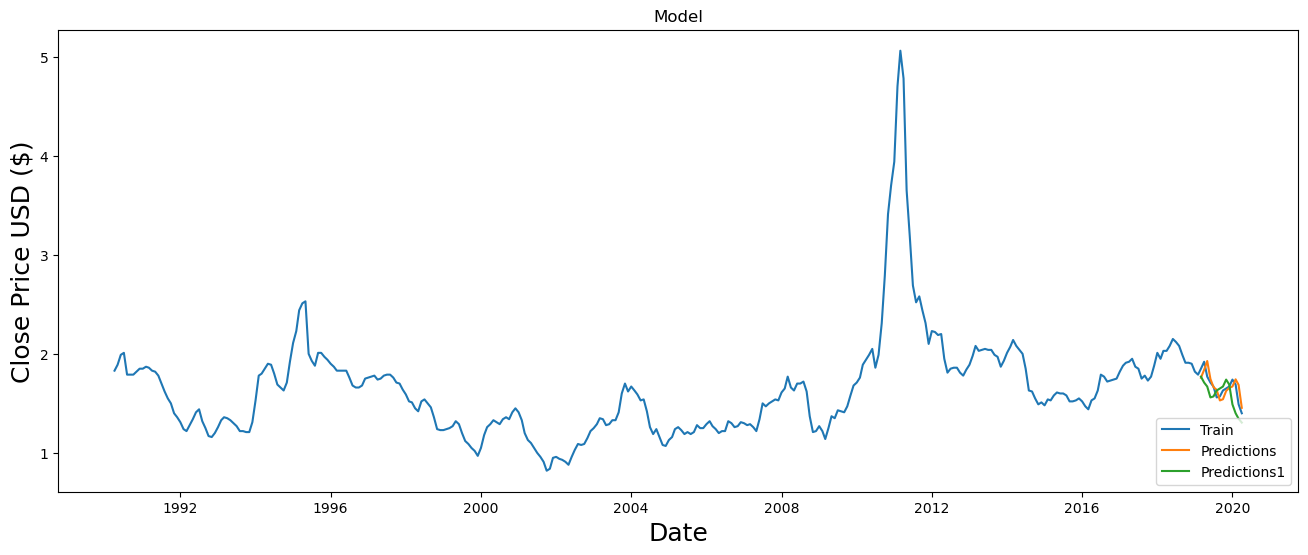

In [107]:
# trực quan hóa lại biểu đồ 
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data['Cotton Price'])
plt.plot(model_train2[['Predictions','predictions1_cotton']])
plt.legend(['Train', 'Predictions','Predictions1'], loc='lower right')
plt.show()


In [108]:

data_cotton = data[310:]

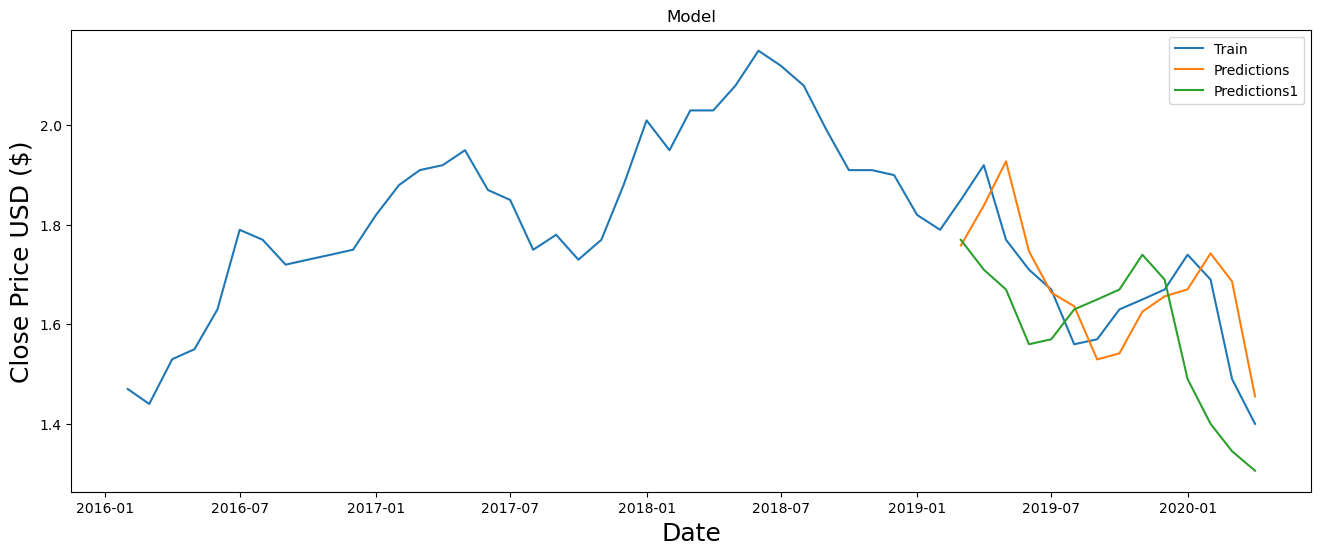

In [109]:
# trực quan hóa lại biểu đồ 
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(data_cotton['Cotton Price'])
plt.plot(model_train2[['Predictions','predictions1_cotton']])
plt.legend(['Train','Predictions','Predictions1'], loc='upper right')
plt.show()
